# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
!pip install matplotlib==2.2.0

    100% |████████████████████████████████| 12.5MB 56kB/s  eta 0:00:01
    100% |████████████████████████████████| 952kB 787kB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

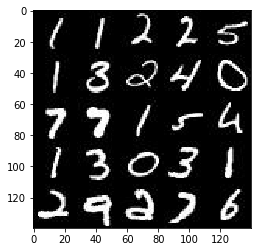

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

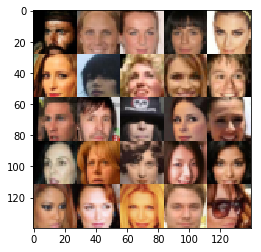

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32,(None, image_width, image_height, image_channels), name ='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name ='input_z')
    learn_rate = tf.placeholder(tf.float32, name ='learning_rate')

    return inputs_real, inputs_z, learn_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [14]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.1
    
    with tf.variable_scope('discriminator', reuse = reuse):
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        x1 = tf.nn.dropout(x1, keep_prob = 0.8)
        relu1 = tf.maximum(alpha*images, images)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        x2 = tf.nn.dropout(x2, keep_prob = 0.8)
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=1, padding='same')
        x3 = tf.nn.dropout(x3, keep_prob = 0.8)
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha*bn3, bn3)
        
        flat = tf.reshape(relu3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [15]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    reuse = False
    
    alpha = 0.1
    
    with tf.variable_scope('generator', reuse=reuse if is_train else not reuse):
        
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.nn.dropout(x1, keep_prob = 0.8)
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(alpha*x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.nn.dropout(x2, keep_prob = 0.8)
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha*x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.nn.dropout(x3, keep_prob = 0.8)
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha*x3, x3)
        
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [21]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    alpha = 0.1
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1-alpha)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [22]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars =tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list = d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list = g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [23]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [24]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print_every = 10
    show_every = 100
    
    batch_num, image_width, image_height, image_channels = data_shape
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))
    
    samples, losses = [], []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images*2
                steps += 1
                
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_real: batch_images, input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs), "Discriminator Loss: {:.4f}...".format(train_loss_d), "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 36, input_z, image_channels, data_image_mode)
                    
        saver.save(sess, './checkpoints/generator.ckpt')
        
    return losses, samples
                    
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.9016... Generator Loss: 1.6172
Epoch 1/2... Discriminator Loss: 1.1016... Generator Loss: 1.2203
Epoch 1/2... Discriminator Loss: 1.1309... Generator Loss: 1.2631
Epoch 1/2... Discriminator Loss: 0.9517... Generator Loss: 1.5554
Epoch 1/2... Discriminator Loss: 1.4383... Generator Loss: 1.0970
Epoch 1/2... Discriminator Loss: 1.1122... Generator Loss: 1.2435
Epoch 1/2... Discriminator Loss: 0.8479... Generator Loss: 1.5837
Epoch 1/2... Discriminator Loss: 0.8432... Generator Loss: 1.4185
Epoch 1/2... Discriminator Loss: 0.9754... Generator Loss: 1.3082
Epoch 1/2... Discriminator Loss: 1.1223... Generator Loss: 1.1722


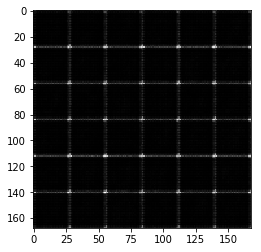

Epoch 1/2... Discriminator Loss: 1.2660... Generator Loss: 1.0881
Epoch 1/2... Discriminator Loss: 1.3884... Generator Loss: 0.9959
Epoch 1/2... Discriminator Loss: 1.2196... Generator Loss: 1.1041
Epoch 1/2... Discriminator Loss: 1.2823... Generator Loss: 0.9621
Epoch 1/2... Discriminator Loss: 1.1257... Generator Loss: 1.1661
Epoch 1/2... Discriminator Loss: 1.1924... Generator Loss: 1.0890
Epoch 1/2... Discriminator Loss: 1.1861... Generator Loss: 0.9606
Epoch 1/2... Discriminator Loss: 1.2107... Generator Loss: 1.0149
Epoch 1/2... Discriminator Loss: 1.2991... Generator Loss: 0.8892
Epoch 1/2... Discriminator Loss: 1.2503... Generator Loss: 1.0266


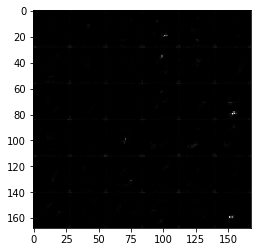

Epoch 1/2... Discriminator Loss: 1.3176... Generator Loss: 0.9187
Epoch 1/2... Discriminator Loss: 1.3905... Generator Loss: 0.9026
Epoch 1/2... Discriminator Loss: 1.1918... Generator Loss: 1.0886
Epoch 1/2... Discriminator Loss: 1.2783... Generator Loss: 1.0350
Epoch 1/2... Discriminator Loss: 1.2927... Generator Loss: 0.9820
Epoch 1/2... Discriminator Loss: 1.2124... Generator Loss: 1.0703
Epoch 1/2... Discriminator Loss: 1.2993... Generator Loss: 1.0157
Epoch 1/2... Discriminator Loss: 1.2702... Generator Loss: 1.0377
Epoch 1/2... Discriminator Loss: 1.1889... Generator Loss: 1.0176
Epoch 1/2... Discriminator Loss: 1.2134... Generator Loss: 1.0585


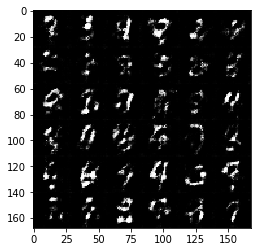

Epoch 1/2... Discriminator Loss: 1.2471... Generator Loss: 0.9913
Epoch 1/2... Discriminator Loss: 1.3057... Generator Loss: 0.9600
Epoch 1/2... Discriminator Loss: 1.2138... Generator Loss: 1.0797
Epoch 1/2... Discriminator Loss: 1.1976... Generator Loss: 1.0575
Epoch 1/2... Discriminator Loss: 1.1632... Generator Loss: 1.0761
Epoch 1/2... Discriminator Loss: 1.2308... Generator Loss: 1.0220
Epoch 1/2... Discriminator Loss: 1.1705... Generator Loss: 1.0958
Epoch 1/2... Discriminator Loss: 1.0747... Generator Loss: 1.0885
Epoch 1/2... Discriminator Loss: 1.1484... Generator Loss: 1.0691
Epoch 1/2... Discriminator Loss: 1.2271... Generator Loss: 1.0175


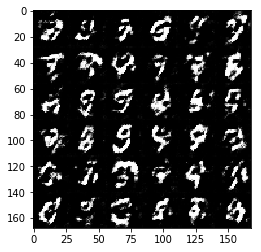

Epoch 1/2... Discriminator Loss: 1.0752... Generator Loss: 1.1179
Epoch 1/2... Discriminator Loss: 1.0706... Generator Loss: 1.1210
Epoch 1/2... Discriminator Loss: 1.0756... Generator Loss: 1.1216
Epoch 1/2... Discriminator Loss: 1.0965... Generator Loss: 1.1587
Epoch 1/2... Discriminator Loss: 1.0169... Generator Loss: 1.1681
Epoch 1/2... Discriminator Loss: 1.0954... Generator Loss: 1.0067
Epoch 1/2... Discriminator Loss: 1.1311... Generator Loss: 1.2438
Epoch 1/2... Discriminator Loss: 1.0514... Generator Loss: 1.1102
Epoch 1/2... Discriminator Loss: 1.0747... Generator Loss: 1.0768
Epoch 1/2... Discriminator Loss: 1.0684... Generator Loss: 1.2182


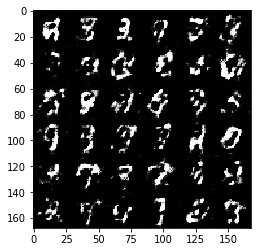

Epoch 1/2... Discriminator Loss: 1.1181... Generator Loss: 1.1236
Epoch 1/2... Discriminator Loss: 1.0832... Generator Loss: 1.2361
Epoch 1/2... Discriminator Loss: 1.0734... Generator Loss: 1.2245
Epoch 1/2... Discriminator Loss: 1.0975... Generator Loss: 1.0979
Epoch 1/2... Discriminator Loss: 1.0528... Generator Loss: 1.1511
Epoch 1/2... Discriminator Loss: 1.0559... Generator Loss: 1.1475
Epoch 1/2... Discriminator Loss: 1.0290... Generator Loss: 1.3923
Epoch 1/2... Discriminator Loss: 1.0578... Generator Loss: 1.2702
Epoch 1/2... Discriminator Loss: 1.0626... Generator Loss: 1.2060
Epoch 1/2... Discriminator Loss: 0.9649... Generator Loss: 1.2894


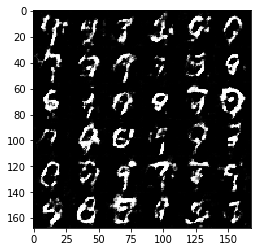

Epoch 1/2... Discriminator Loss: 0.9470... Generator Loss: 1.2649
Epoch 1/2... Discriminator Loss: 0.9977... Generator Loss: 1.2143
Epoch 1/2... Discriminator Loss: 0.9593... Generator Loss: 1.3703
Epoch 1/2... Discriminator Loss: 0.9258... Generator Loss: 1.3246
Epoch 1/2... Discriminator Loss: 1.0322... Generator Loss: 1.4226
Epoch 1/2... Discriminator Loss: 0.9764... Generator Loss: 1.1975
Epoch 1/2... Discriminator Loss: 1.0699... Generator Loss: 1.2965
Epoch 1/2... Discriminator Loss: 0.9374... Generator Loss: 1.3127
Epoch 1/2... Discriminator Loss: 1.0232... Generator Loss: 1.2868
Epoch 1/2... Discriminator Loss: 1.0490... Generator Loss: 1.0743


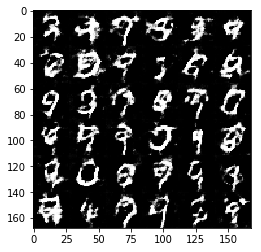

Epoch 1/2... Discriminator Loss: 1.0726... Generator Loss: 1.1064
Epoch 1/2... Discriminator Loss: 1.0101... Generator Loss: 1.2748
Epoch 1/2... Discriminator Loss: 1.0091... Generator Loss: 1.1612
Epoch 1/2... Discriminator Loss: 0.9825... Generator Loss: 1.3398
Epoch 1/2... Discriminator Loss: 0.9655... Generator Loss: 1.2743
Epoch 1/2... Discriminator Loss: 0.9422... Generator Loss: 1.2986
Epoch 1/2... Discriminator Loss: 0.9798... Generator Loss: 1.2652
Epoch 1/2... Discriminator Loss: 1.0446... Generator Loss: 1.2503
Epoch 1/2... Discriminator Loss: 1.0878... Generator Loss: 1.2031
Epoch 1/2... Discriminator Loss: 1.1168... Generator Loss: 1.2246


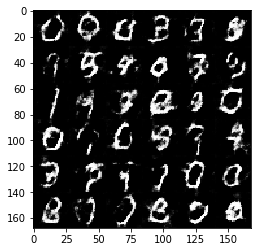

Epoch 1/2... Discriminator Loss: 1.0940... Generator Loss: 1.1690
Epoch 1/2... Discriminator Loss: 1.1524... Generator Loss: 1.0089
Epoch 1/2... Discriminator Loss: 1.1025... Generator Loss: 1.3395
Epoch 1/2... Discriminator Loss: 1.0782... Generator Loss: 1.2088
Epoch 1/2... Discriminator Loss: 1.1045... Generator Loss: 1.1321
Epoch 1/2... Discriminator Loss: 1.1149... Generator Loss: 1.2305
Epoch 1/2... Discriminator Loss: 1.0746... Generator Loss: 1.2888
Epoch 1/2... Discriminator Loss: 1.1514... Generator Loss: 1.1335
Epoch 1/2... Discriminator Loss: 1.1146... Generator Loss: 1.2702
Epoch 1/2... Discriminator Loss: 1.1209... Generator Loss: 1.1542


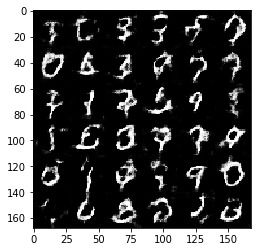

Epoch 1/2... Discriminator Loss: 1.1447... Generator Loss: 0.9578
Epoch 1/2... Discriminator Loss: 1.1273... Generator Loss: 1.0890
Epoch 1/2... Discriminator Loss: 1.1160... Generator Loss: 1.1289
Epoch 1/2... Discriminator Loss: 1.1495... Generator Loss: 1.1459
Epoch 1/2... Discriminator Loss: 1.1078... Generator Loss: 1.4191
Epoch 1/2... Discriminator Loss: 1.1609... Generator Loss: 1.3036
Epoch 1/2... Discriminator Loss: 1.0374... Generator Loss: 1.4449
Epoch 1/2... Discriminator Loss: 1.0989... Generator Loss: 1.2696
Epoch 1/2... Discriminator Loss: 1.0806... Generator Loss: 1.2853
Epoch 1/2... Discriminator Loss: 1.1553... Generator Loss: 1.1360


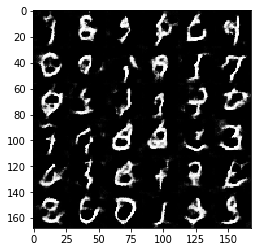

Epoch 1/2... Discriminator Loss: 1.0908... Generator Loss: 1.2017
Epoch 1/2... Discriminator Loss: 1.0831... Generator Loss: 1.1997
Epoch 1/2... Discriminator Loss: 1.0501... Generator Loss: 1.1191
Epoch 1/2... Discriminator Loss: 1.0532... Generator Loss: 1.1612
Epoch 1/2... Discriminator Loss: 1.0773... Generator Loss: 1.2612
Epoch 1/2... Discriminator Loss: 1.1969... Generator Loss: 1.1414
Epoch 1/2... Discriminator Loss: 1.1470... Generator Loss: 1.1516
Epoch 1/2... Discriminator Loss: 1.2512... Generator Loss: 1.0380
Epoch 1/2... Discriminator Loss: 1.1831... Generator Loss: 1.1553
Epoch 1/2... Discriminator Loss: 1.1934... Generator Loss: 0.9919


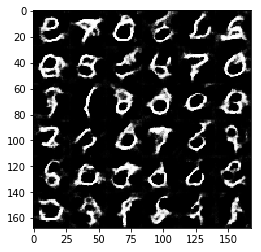

Epoch 1/2... Discriminator Loss: 1.0796... Generator Loss: 1.0537
Epoch 1/2... Discriminator Loss: 1.1149... Generator Loss: 1.0787
Epoch 1/2... Discriminator Loss: 1.0127... Generator Loss: 1.2314
Epoch 1/2... Discriminator Loss: 1.1311... Generator Loss: 1.1025
Epoch 1/2... Discriminator Loss: 1.0682... Generator Loss: 1.0994
Epoch 1/2... Discriminator Loss: 1.0715... Generator Loss: 1.1141
Epoch 1/2... Discriminator Loss: 1.2199... Generator Loss: 0.9112
Epoch 1/2... Discriminator Loss: 1.1969... Generator Loss: 1.1352
Epoch 1/2... Discriminator Loss: 1.1322... Generator Loss: 1.0767
Epoch 1/2... Discriminator Loss: 1.1188... Generator Loss: 1.1468


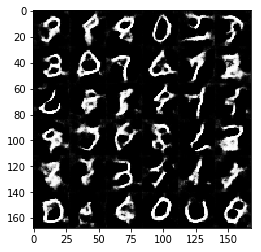

Epoch 1/2... Discriminator Loss: 1.2338... Generator Loss: 0.9256
Epoch 1/2... Discriminator Loss: 1.1197... Generator Loss: 1.0944
Epoch 1/2... Discriminator Loss: 1.1166... Generator Loss: 1.0575
Epoch 1/2... Discriminator Loss: 1.1359... Generator Loss: 1.1711
Epoch 1/2... Discriminator Loss: 1.1566... Generator Loss: 0.9734
Epoch 1/2... Discriminator Loss: 1.2185... Generator Loss: 1.0473
Epoch 1/2... Discriminator Loss: 1.2452... Generator Loss: 0.9849
Epoch 1/2... Discriminator Loss: 1.2774... Generator Loss: 0.9460
Epoch 1/2... Discriminator Loss: 1.1233... Generator Loss: 1.0887
Epoch 1/2... Discriminator Loss: 1.2190... Generator Loss: 1.0105


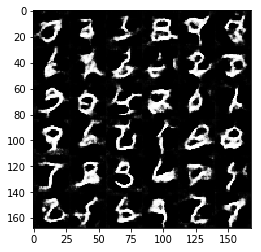

Epoch 1/2... Discriminator Loss: 1.2013... Generator Loss: 1.2303
Epoch 1/2... Discriminator Loss: 1.1909... Generator Loss: 1.2229
Epoch 1/2... Discriminator Loss: 1.1492... Generator Loss: 1.0886
Epoch 1/2... Discriminator Loss: 1.2289... Generator Loss: 0.9820
Epoch 1/2... Discriminator Loss: 1.2366... Generator Loss: 1.0276
Epoch 1/2... Discriminator Loss: 1.1080... Generator Loss: 1.1530
Epoch 1/2... Discriminator Loss: 1.3017... Generator Loss: 0.9109
Epoch 1/2... Discriminator Loss: 1.1281... Generator Loss: 1.1718
Epoch 1/2... Discriminator Loss: 1.2700... Generator Loss: 0.9612
Epoch 1/2... Discriminator Loss: 1.2062... Generator Loss: 0.9561


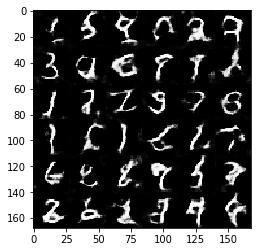

Epoch 1/2... Discriminator Loss: 1.2257... Generator Loss: 0.9848
Epoch 1/2... Discriminator Loss: 1.2790... Generator Loss: 1.0078
Epoch 1/2... Discriminator Loss: 1.1052... Generator Loss: 1.1244
Epoch 1/2... Discriminator Loss: 1.2472... Generator Loss: 1.1584
Epoch 1/2... Discriminator Loss: 1.1345... Generator Loss: 1.0539
Epoch 1/2... Discriminator Loss: 1.2085... Generator Loss: 1.0351
Epoch 1/2... Discriminator Loss: 1.1170... Generator Loss: 1.1076
Epoch 1/2... Discriminator Loss: 1.2147... Generator Loss: 1.0957
Epoch 1/2... Discriminator Loss: 1.1152... Generator Loss: 0.9845
Epoch 1/2... Discriminator Loss: 1.2089... Generator Loss: 1.0775


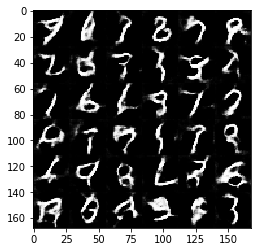

Epoch 1/2... Discriminator Loss: 1.1891... Generator Loss: 1.0448
Epoch 1/2... Discriminator Loss: 1.2515... Generator Loss: 0.9106
Epoch 1/2... Discriminator Loss: 1.1775... Generator Loss: 0.9655
Epoch 1/2... Discriminator Loss: 1.1505... Generator Loss: 0.9929
Epoch 1/2... Discriminator Loss: 1.2078... Generator Loss: 1.0062
Epoch 1/2... Discriminator Loss: 1.2177... Generator Loss: 1.0495
Epoch 1/2... Discriminator Loss: 1.1865... Generator Loss: 0.9877
Epoch 1/2... Discriminator Loss: 1.2621... Generator Loss: 0.7901
Epoch 1/2... Discriminator Loss: 1.2314... Generator Loss: 0.9160
Epoch 1/2... Discriminator Loss: 1.1345... Generator Loss: 0.9582


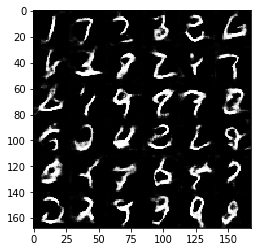

Epoch 1/2... Discriminator Loss: 1.1631... Generator Loss: 0.9351
Epoch 1/2... Discriminator Loss: 1.1635... Generator Loss: 1.0721
Epoch 1/2... Discriminator Loss: 1.1522... Generator Loss: 1.2511
Epoch 1/2... Discriminator Loss: 1.1530... Generator Loss: 1.1201
Epoch 1/2... Discriminator Loss: 1.1165... Generator Loss: 1.0337
Epoch 1/2... Discriminator Loss: 1.2281... Generator Loss: 1.0388
Epoch 1/2... Discriminator Loss: 1.1458... Generator Loss: 1.1962
Epoch 1/2... Discriminator Loss: 1.1224... Generator Loss: 1.0664
Epoch 1/2... Discriminator Loss: 1.1833... Generator Loss: 1.0603
Epoch 1/2... Discriminator Loss: 1.1504... Generator Loss: 1.1728


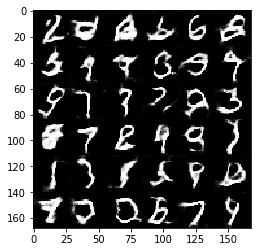

Epoch 1/2... Discriminator Loss: 1.1992... Generator Loss: 1.0427
Epoch 1/2... Discriminator Loss: 1.2361... Generator Loss: 1.0567
Epoch 1/2... Discriminator Loss: 1.2417... Generator Loss: 1.2236
Epoch 1/2... Discriminator Loss: 1.2409... Generator Loss: 1.0130
Epoch 1/2... Discriminator Loss: 1.1453... Generator Loss: 1.2873
Epoch 1/2... Discriminator Loss: 1.2849... Generator Loss: 0.8003
Epoch 1/2... Discriminator Loss: 1.2221... Generator Loss: 0.9193
Epoch 1/2... Discriminator Loss: 1.1596... Generator Loss: 1.0616
Epoch 1/2... Discriminator Loss: 1.1969... Generator Loss: 1.1006
Epoch 1/2... Discriminator Loss: 1.2493... Generator Loss: 1.0671


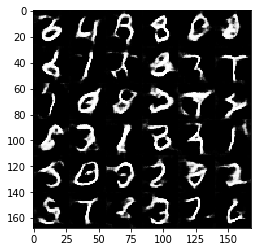

Epoch 1/2... Discriminator Loss: 1.2797... Generator Loss: 0.9044
Epoch 1/2... Discriminator Loss: 1.2145... Generator Loss: 1.2753
Epoch 1/2... Discriminator Loss: 1.2820... Generator Loss: 0.9850
Epoch 1/2... Discriminator Loss: 1.2073... Generator Loss: 0.9983
Epoch 1/2... Discriminator Loss: 1.1834... Generator Loss: 1.0816
Epoch 1/2... Discriminator Loss: 1.1081... Generator Loss: 1.2993
Epoch 1/2... Discriminator Loss: 1.2373... Generator Loss: 0.9263
Epoch 2/2... Discriminator Loss: 1.1321... Generator Loss: 1.2287
Epoch 2/2... Discriminator Loss: 1.2089... Generator Loss: 1.0270
Epoch 2/2... Discriminator Loss: 1.1019... Generator Loss: 1.0789


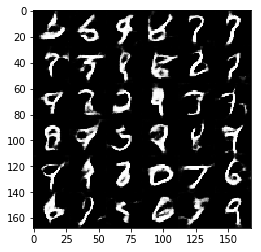

Epoch 2/2... Discriminator Loss: 1.1816... Generator Loss: 1.0063
Epoch 2/2... Discriminator Loss: 1.1860... Generator Loss: 1.1359
Epoch 2/2... Discriminator Loss: 1.1804... Generator Loss: 1.0181
Epoch 2/2... Discriminator Loss: 1.1632... Generator Loss: 1.0031
Epoch 2/2... Discriminator Loss: 1.2499... Generator Loss: 0.9323
Epoch 2/2... Discriminator Loss: 1.2119... Generator Loss: 1.0508
Epoch 2/2... Discriminator Loss: 1.1450... Generator Loss: 1.2191
Epoch 2/2... Discriminator Loss: 1.2851... Generator Loss: 1.0273
Epoch 2/2... Discriminator Loss: 1.2486... Generator Loss: 0.9955
Epoch 2/2... Discriminator Loss: 1.2934... Generator Loss: 0.9427


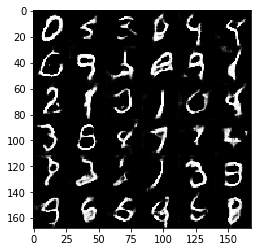

Epoch 2/2... Discriminator Loss: 1.1537... Generator Loss: 1.0662
Epoch 2/2... Discriminator Loss: 1.2692... Generator Loss: 1.1127
Epoch 2/2... Discriminator Loss: 1.2163... Generator Loss: 0.9962
Epoch 2/2... Discriminator Loss: 1.2291... Generator Loss: 1.1089
Epoch 2/2... Discriminator Loss: 1.1408... Generator Loss: 1.0314
Epoch 2/2... Discriminator Loss: 1.2567... Generator Loss: 0.9284
Epoch 2/2... Discriminator Loss: 1.0930... Generator Loss: 1.2438
Epoch 2/2... Discriminator Loss: 1.1417... Generator Loss: 1.0420
Epoch 2/2... Discriminator Loss: 1.2076... Generator Loss: 0.8760
Epoch 2/2... Discriminator Loss: 1.1824... Generator Loss: 0.8997


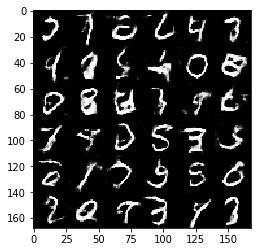

Epoch 2/2... Discriminator Loss: 1.1289... Generator Loss: 1.0216
Epoch 2/2... Discriminator Loss: 1.2674... Generator Loss: 0.9066
Epoch 2/2... Discriminator Loss: 1.2754... Generator Loss: 1.2850
Epoch 2/2... Discriminator Loss: 1.3073... Generator Loss: 0.9241
Epoch 2/2... Discriminator Loss: 1.2788... Generator Loss: 0.9222
Epoch 2/2... Discriminator Loss: 1.2272... Generator Loss: 1.0576
Epoch 2/2... Discriminator Loss: 1.2522... Generator Loss: 1.0536
Epoch 2/2... Discriminator Loss: 1.3029... Generator Loss: 0.9347
Epoch 2/2... Discriminator Loss: 1.3464... Generator Loss: 0.7939
Epoch 2/2... Discriminator Loss: 1.2225... Generator Loss: 1.0468


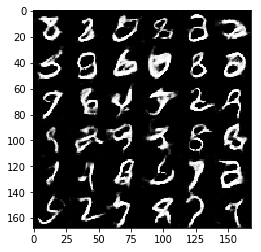

Epoch 2/2... Discriminator Loss: 1.2024... Generator Loss: 1.1094
Epoch 2/2... Discriminator Loss: 1.0837... Generator Loss: 1.2101
Epoch 2/2... Discriminator Loss: 1.2888... Generator Loss: 0.8530
Epoch 2/2... Discriminator Loss: 1.2846... Generator Loss: 0.8373
Epoch 2/2... Discriminator Loss: 1.2093... Generator Loss: 1.0532
Epoch 2/2... Discriminator Loss: 1.2282... Generator Loss: 0.9160
Epoch 2/2... Discriminator Loss: 1.2125... Generator Loss: 1.1288
Epoch 2/2... Discriminator Loss: 1.1599... Generator Loss: 1.1448
Epoch 2/2... Discriminator Loss: 1.1766... Generator Loss: 1.0467
Epoch 2/2... Discriminator Loss: 1.1656... Generator Loss: 0.9980


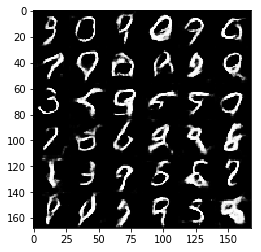

Epoch 2/2... Discriminator Loss: 1.0915... Generator Loss: 1.1584
Epoch 2/2... Discriminator Loss: 1.2749... Generator Loss: 1.1792
Epoch 2/2... Discriminator Loss: 1.2541... Generator Loss: 1.0368
Epoch 2/2... Discriminator Loss: 1.1995... Generator Loss: 1.0491
Epoch 2/2... Discriminator Loss: 1.2248... Generator Loss: 1.3522
Epoch 2/2... Discriminator Loss: 1.1873... Generator Loss: 1.2146
Epoch 2/2... Discriminator Loss: 1.2727... Generator Loss: 0.9604
Epoch 2/2... Discriminator Loss: 1.2645... Generator Loss: 0.9535
Epoch 2/2... Discriminator Loss: 1.2037... Generator Loss: 1.0249
Epoch 2/2... Discriminator Loss: 1.0870... Generator Loss: 1.2965


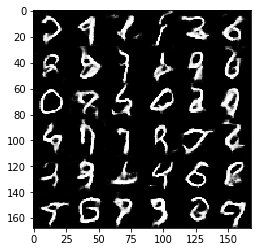

Epoch 2/2... Discriminator Loss: 1.2283... Generator Loss: 1.1843
Epoch 2/2... Discriminator Loss: 1.2113... Generator Loss: 1.1269
Epoch 2/2... Discriminator Loss: 1.2362... Generator Loss: 0.9880
Epoch 2/2... Discriminator Loss: 1.2426... Generator Loss: 0.9217
Epoch 2/2... Discriminator Loss: 1.1757... Generator Loss: 1.1416
Epoch 2/2... Discriminator Loss: 1.1824... Generator Loss: 1.0430
Epoch 2/2... Discriminator Loss: 1.1866... Generator Loss: 0.9544
Epoch 2/2... Discriminator Loss: 1.3138... Generator Loss: 1.0311
Epoch 2/2... Discriminator Loss: 1.2601... Generator Loss: 0.8968
Epoch 2/2... Discriminator Loss: 1.2824... Generator Loss: 0.9760


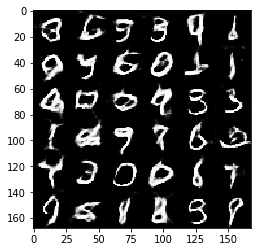

Epoch 2/2... Discriminator Loss: 1.3404... Generator Loss: 0.7925
Epoch 2/2... Discriminator Loss: 1.2543... Generator Loss: 1.0487
Epoch 2/2... Discriminator Loss: 1.1829... Generator Loss: 0.9910
Epoch 2/2... Discriminator Loss: 1.2635... Generator Loss: 0.9620
Epoch 2/2... Discriminator Loss: 1.1898... Generator Loss: 1.0233
Epoch 2/2... Discriminator Loss: 1.2438... Generator Loss: 0.9161
Epoch 2/2... Discriminator Loss: 1.1667... Generator Loss: 1.0785
Epoch 2/2... Discriminator Loss: 1.2968... Generator Loss: 0.9707
Epoch 2/2... Discriminator Loss: 1.2425... Generator Loss: 1.0899
Epoch 2/2... Discriminator Loss: 1.2428... Generator Loss: 0.9391


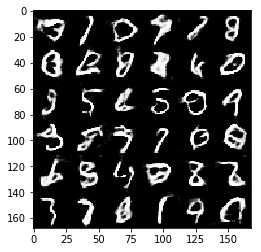

Epoch 2/2... Discriminator Loss: 1.1992... Generator Loss: 0.9567
Epoch 2/2... Discriminator Loss: 1.2264... Generator Loss: 1.0674
Epoch 2/2... Discriminator Loss: 1.1744... Generator Loss: 1.0771
Epoch 2/2... Discriminator Loss: 1.2652... Generator Loss: 1.2014
Epoch 2/2... Discriminator Loss: 1.2254... Generator Loss: 1.0902
Epoch 2/2... Discriminator Loss: 1.1982... Generator Loss: 1.0002
Epoch 2/2... Discriminator Loss: 1.3884... Generator Loss: 0.8032
Epoch 2/2... Discriminator Loss: 1.2294... Generator Loss: 1.1302
Epoch 2/2... Discriminator Loss: 1.2956... Generator Loss: 1.0656
Epoch 2/2... Discriminator Loss: 1.1961... Generator Loss: 1.1264


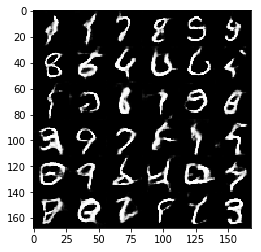

Epoch 2/2... Discriminator Loss: 1.1567... Generator Loss: 1.2684
Epoch 2/2... Discriminator Loss: 1.1614... Generator Loss: 0.9673
Epoch 2/2... Discriminator Loss: 1.1334... Generator Loss: 1.0415
Epoch 2/2... Discriminator Loss: 1.1472... Generator Loss: 1.1670
Epoch 2/2... Discriminator Loss: 1.2673... Generator Loss: 0.9112
Epoch 2/2... Discriminator Loss: 1.2667... Generator Loss: 0.9734
Epoch 2/2... Discriminator Loss: 1.1524... Generator Loss: 1.4057
Epoch 2/2... Discriminator Loss: 1.2296... Generator Loss: 0.9116
Epoch 2/2... Discriminator Loss: 1.2224... Generator Loss: 0.8625
Epoch 2/2... Discriminator Loss: 1.2907... Generator Loss: 1.3478


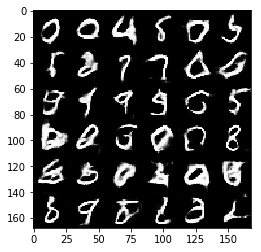

Epoch 2/2... Discriminator Loss: 1.1890... Generator Loss: 1.1305
Epoch 2/2... Discriminator Loss: 1.1347... Generator Loss: 1.1125
Epoch 2/2... Discriminator Loss: 1.1948... Generator Loss: 0.9718
Epoch 2/2... Discriminator Loss: 1.1970... Generator Loss: 1.0843
Epoch 2/2... Discriminator Loss: 1.1398... Generator Loss: 0.9893
Epoch 2/2... Discriminator Loss: 1.1917... Generator Loss: 1.0581
Epoch 2/2... Discriminator Loss: 1.3048... Generator Loss: 0.9000
Epoch 2/2... Discriminator Loss: 1.1744... Generator Loss: 1.2627
Epoch 2/2... Discriminator Loss: 1.1801... Generator Loss: 1.1278
Epoch 2/2... Discriminator Loss: 1.1968... Generator Loss: 1.1095


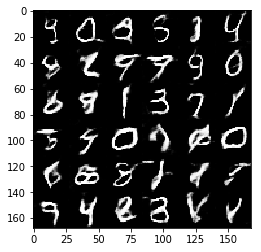

Epoch 2/2... Discriminator Loss: 1.1424... Generator Loss: 1.1328
Epoch 2/2... Discriminator Loss: 1.1335... Generator Loss: 1.0564
Epoch 2/2... Discriminator Loss: 1.3077... Generator Loss: 0.9869
Epoch 2/2... Discriminator Loss: 1.3224... Generator Loss: 0.7560
Epoch 2/2... Discriminator Loss: 1.1973... Generator Loss: 1.0297
Epoch 2/2... Discriminator Loss: 1.1863... Generator Loss: 1.0649
Epoch 2/2... Discriminator Loss: 1.1885... Generator Loss: 0.9780
Epoch 2/2... Discriminator Loss: 1.1135... Generator Loss: 1.1976
Epoch 2/2... Discriminator Loss: 1.1465... Generator Loss: 1.1952
Epoch 2/2... Discriminator Loss: 1.2273... Generator Loss: 1.0760


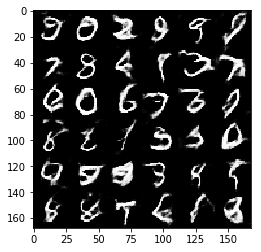

Epoch 2/2... Discriminator Loss: 1.1885... Generator Loss: 1.0612
Epoch 2/2... Discriminator Loss: 1.2227... Generator Loss: 1.1439
Epoch 2/2... Discriminator Loss: 1.2184... Generator Loss: 0.8690
Epoch 2/2... Discriminator Loss: 1.1055... Generator Loss: 1.0896
Epoch 2/2... Discriminator Loss: 1.2054... Generator Loss: 0.9835
Epoch 2/2... Discriminator Loss: 1.3567... Generator Loss: 1.1401
Epoch 2/2... Discriminator Loss: 1.2658... Generator Loss: 0.7952
Epoch 2/2... Discriminator Loss: 1.2123... Generator Loss: 1.0691
Epoch 2/2... Discriminator Loss: 1.1339... Generator Loss: 1.0825
Epoch 2/2... Discriminator Loss: 1.1665... Generator Loss: 1.0184


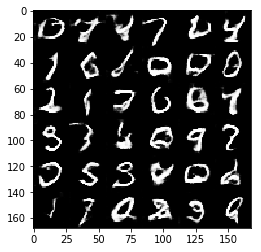

Epoch 2/2... Discriminator Loss: 1.3154... Generator Loss: 1.1764
Epoch 2/2... Discriminator Loss: 1.1834... Generator Loss: 1.0215
Epoch 2/2... Discriminator Loss: 1.2750... Generator Loss: 1.0573
Epoch 2/2... Discriminator Loss: 1.2093... Generator Loss: 0.8879
Epoch 2/2... Discriminator Loss: 1.1503... Generator Loss: 1.1591
Epoch 2/2... Discriminator Loss: 1.4059... Generator Loss: 0.7950
Epoch 2/2... Discriminator Loss: 1.1678... Generator Loss: 1.1800
Epoch 2/2... Discriminator Loss: 1.1900... Generator Loss: 1.1482
Epoch 2/2... Discriminator Loss: 1.2099... Generator Loss: 1.1515
Epoch 2/2... Discriminator Loss: 1.2944... Generator Loss: 0.9557


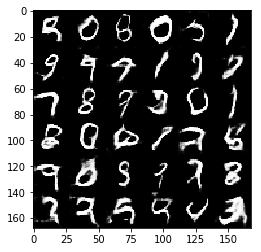

Epoch 2/2... Discriminator Loss: 1.2784... Generator Loss: 1.1340
Epoch 2/2... Discriminator Loss: 1.2357... Generator Loss: 0.8118
Epoch 2/2... Discriminator Loss: 1.1435... Generator Loss: 1.1102
Epoch 2/2... Discriminator Loss: 1.2277... Generator Loss: 1.1213
Epoch 2/2... Discriminator Loss: 1.2273... Generator Loss: 1.0093
Epoch 2/2... Discriminator Loss: 1.3093... Generator Loss: 1.1673
Epoch 2/2... Discriminator Loss: 1.1556... Generator Loss: 1.0173
Epoch 2/2... Discriminator Loss: 1.2217... Generator Loss: 1.0107
Epoch 2/2... Discriminator Loss: 1.2022... Generator Loss: 1.0334
Epoch 2/2... Discriminator Loss: 1.1957... Generator Loss: 1.0138


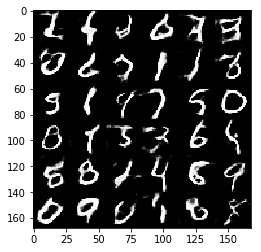

Epoch 2/2... Discriminator Loss: 1.1281... Generator Loss: 1.1974
Epoch 2/2... Discriminator Loss: 1.3097... Generator Loss: 0.9300
Epoch 2/2... Discriminator Loss: 1.2042... Generator Loss: 0.8806
Epoch 2/2... Discriminator Loss: 1.2511... Generator Loss: 1.1427
Epoch 2/2... Discriminator Loss: 1.1780... Generator Loss: 0.9653
Epoch 2/2... Discriminator Loss: 1.2852... Generator Loss: 0.8814
Epoch 2/2... Discriminator Loss: 1.1851... Generator Loss: 0.9480
Epoch 2/2... Discriminator Loss: 1.3100... Generator Loss: 1.0258
Epoch 2/2... Discriminator Loss: 1.2289... Generator Loss: 1.1142
Epoch 2/2... Discriminator Loss: 1.2226... Generator Loss: 1.1567


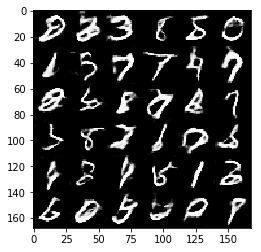

Epoch 2/2... Discriminator Loss: 1.2375... Generator Loss: 1.1669
Epoch 2/2... Discriminator Loss: 1.2514... Generator Loss: 0.9222
Epoch 2/2... Discriminator Loss: 1.2931... Generator Loss: 1.1035
Epoch 2/2... Discriminator Loss: 1.1735... Generator Loss: 0.9753
Epoch 2/2... Discriminator Loss: 1.2827... Generator Loss: 0.9853
Epoch 2/2... Discriminator Loss: 1.2128... Generator Loss: 1.3630
Epoch 2/2... Discriminator Loss: 1.2211... Generator Loss: 0.8824
Epoch 2/2... Discriminator Loss: 1.2564... Generator Loss: 0.9177
Epoch 2/2... Discriminator Loss: 1.2248... Generator Loss: 1.0410
Epoch 2/2... Discriminator Loss: 1.2264... Generator Loss: 1.0734


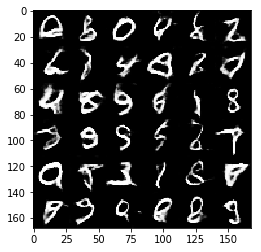

Epoch 2/2... Discriminator Loss: 1.1970... Generator Loss: 0.8710
Epoch 2/2... Discriminator Loss: 1.1749... Generator Loss: 1.0964
Epoch 2/2... Discriminator Loss: 1.2471... Generator Loss: 0.9397
Epoch 2/2... Discriminator Loss: 1.1644... Generator Loss: 0.9777
Epoch 2/2... Discriminator Loss: 1.1484... Generator Loss: 1.1571
Epoch 2/2... Discriminator Loss: 1.1536... Generator Loss: 0.9673
Epoch 2/2... Discriminator Loss: 1.1608... Generator Loss: 1.0747
Epoch 2/2... Discriminator Loss: 1.1003... Generator Loss: 1.0866
Epoch 2/2... Discriminator Loss: 1.1374... Generator Loss: 1.0353
Epoch 2/2... Discriminator Loss: 1.1855... Generator Loss: 1.0339


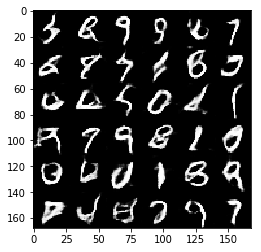

Epoch 2/2... Discriminator Loss: 1.1768... Generator Loss: 1.0269
Epoch 2/2... Discriminator Loss: 1.2891... Generator Loss: 0.9260
Epoch 2/2... Discriminator Loss: 1.2301... Generator Loss: 0.8460
Epoch 2/2... Discriminator Loss: 1.1336... Generator Loss: 1.2145
Epoch 2/2... Discriminator Loss: 1.1599... Generator Loss: 0.9355
Epoch 2/2... Discriminator Loss: 1.2044... Generator Loss: 1.1491
Epoch 2/2... Discriminator Loss: 1.1576... Generator Loss: 1.0721
Epoch 2/2... Discriminator Loss: 1.2209... Generator Loss: 1.0049
Epoch 2/2... Discriminator Loss: 1.1952... Generator Loss: 1.0960
Epoch 2/2... Discriminator Loss: 1.2483... Generator Loss: 0.9047


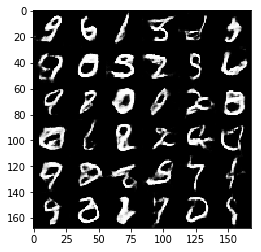

Epoch 2/2... Discriminator Loss: 1.2504... Generator Loss: 1.0671
Epoch 2/2... Discriminator Loss: 1.1480... Generator Loss: 0.9532
Epoch 2/2... Discriminator Loss: 1.2649... Generator Loss: 1.0639
Epoch 2/2... Discriminator Loss: 1.2220... Generator Loss: 0.9184
Epoch 2/2... Discriminator Loss: 1.3179... Generator Loss: 0.7795


In [25]:
batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.7975... Generator Loss: 1.6372
Epoch 1/1... Discriminator Loss: 0.9929... Generator Loss: 1.4104
Epoch 1/1... Discriminator Loss: 0.6815... Generator Loss: 1.9037
Epoch 1/1... Discriminator Loss: 0.6712... Generator Loss: 1.9940
Epoch 1/1... Discriminator Loss: 0.5775... Generator Loss: 2.6424
Epoch 1/1... Discriminator Loss: 0.6188... Generator Loss: 2.1509
Epoch 1/1... Discriminator Loss: 0.5776... Generator Loss: 2.3375
Epoch 1/1... Discriminator Loss: 0.6722... Generator Loss: 1.9499
Epoch 1/1... Discriminator Loss: 0.7272... Generator Loss: 1.7931
Epoch 1/1... Discriminator Loss: 0.7212... Generator Loss: 1.8948


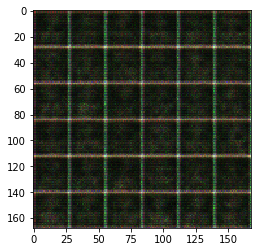

Epoch 1/1... Discriminator Loss: 0.6574... Generator Loss: 2.0600
Epoch 1/1... Discriminator Loss: 0.6949... Generator Loss: 2.1306
Epoch 1/1... Discriminator Loss: 0.7028... Generator Loss: 1.9940
Epoch 1/1... Discriminator Loss: 0.5328... Generator Loss: 2.3597
Epoch 1/1... Discriminator Loss: 0.7153... Generator Loss: 2.0397
Epoch 1/1... Discriminator Loss: 0.6404... Generator Loss: 2.1266
Epoch 1/1... Discriminator Loss: 0.6360... Generator Loss: 2.4244
Epoch 1/1... Discriminator Loss: 0.5894... Generator Loss: 2.0340
Epoch 1/1... Discriminator Loss: 0.5588... Generator Loss: 2.4672
Epoch 1/1... Discriminator Loss: 0.5896... Generator Loss: 2.1980


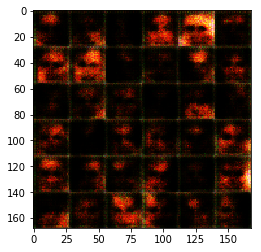

Epoch 1/1... Discriminator Loss: 0.5743... Generator Loss: 2.2691
Epoch 1/1... Discriminator Loss: 0.5203... Generator Loss: 2.8555
Epoch 1/1... Discriminator Loss: 0.5156... Generator Loss: 2.7792
Epoch 1/1... Discriminator Loss: 0.4537... Generator Loss: 3.1487
Epoch 1/1... Discriminator Loss: 0.4947... Generator Loss: 2.7670
Epoch 1/1... Discriminator Loss: 0.4248... Generator Loss: 3.0961
Epoch 1/1... Discriminator Loss: 0.4871... Generator Loss: 3.0820
Epoch 1/1... Discriminator Loss: 0.5529... Generator Loss: 2.4099
Epoch 1/1... Discriminator Loss: 0.4966... Generator Loss: 2.7550
Epoch 1/1... Discriminator Loss: 0.5267... Generator Loss: 2.3691


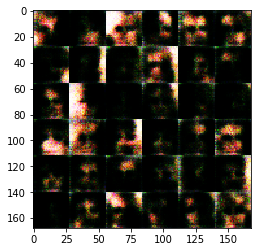

Epoch 1/1... Discriminator Loss: 0.4841... Generator Loss: 2.7320
Epoch 1/1... Discriminator Loss: 0.4901... Generator Loss: 2.5515
Epoch 1/1... Discriminator Loss: 0.4604... Generator Loss: 2.9204
Epoch 1/1... Discriminator Loss: 0.4140... Generator Loss: 4.0676
Epoch 1/1... Discriminator Loss: 0.3972... Generator Loss: 4.4528
Epoch 1/1... Discriminator Loss: 0.4631... Generator Loss: 3.0187
Epoch 1/1... Discriminator Loss: 0.3890... Generator Loss: 3.9665
Epoch 1/1... Discriminator Loss: 0.3972... Generator Loss: 3.8840
Epoch 1/1... Discriminator Loss: 0.4164... Generator Loss: 3.9711
Epoch 1/1... Discriminator Loss: 0.4733... Generator Loss: 2.9025


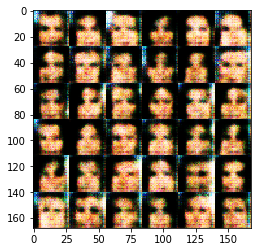

Epoch 1/1... Discriminator Loss: 0.4541... Generator Loss: 2.7989
Epoch 1/1... Discriminator Loss: 0.4780... Generator Loss: 3.6576
Epoch 1/1... Discriminator Loss: 0.4726... Generator Loss: 3.4579
Epoch 1/1... Discriminator Loss: 0.5022... Generator Loss: 3.5331
Epoch 1/1... Discriminator Loss: 0.5300... Generator Loss: 2.0216
Epoch 1/1... Discriminator Loss: 0.4729... Generator Loss: 2.5626
Epoch 1/1... Discriminator Loss: 0.7157... Generator Loss: 1.6848
Epoch 1/1... Discriminator Loss: 0.4881... Generator Loss: 2.4962
Epoch 1/1... Discriminator Loss: 0.6066... Generator Loss: 1.7236
Epoch 1/1... Discriminator Loss: 0.4715... Generator Loss: 2.9187


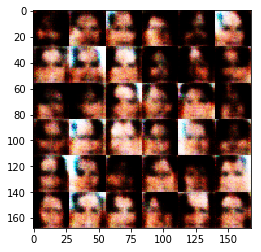

Epoch 1/1... Discriminator Loss: 0.4590... Generator Loss: 2.8057
Epoch 1/1... Discriminator Loss: 0.5194... Generator Loss: 3.6116
Epoch 1/1... Discriminator Loss: 0.4976... Generator Loss: 2.4876
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 0.7795
Epoch 1/1... Discriminator Loss: 0.5372... Generator Loss: 2.3507
Epoch 1/1... Discriminator Loss: 0.5838... Generator Loss: 1.8977
Epoch 1/1... Discriminator Loss: 0.4567... Generator Loss: 2.8668
Epoch 1/1... Discriminator Loss: 0.4891... Generator Loss: 2.9946
Epoch 1/1... Discriminator Loss: 0.5095... Generator Loss: 2.3924
Epoch 1/1... Discriminator Loss: 0.5747... Generator Loss: 2.5805


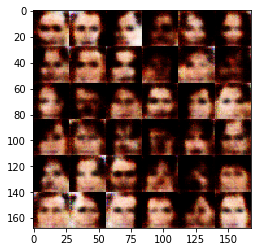

Epoch 1/1... Discriminator Loss: 0.6825... Generator Loss: 2.7929
Epoch 1/1... Discriminator Loss: 0.5473... Generator Loss: 2.1694
Epoch 1/1... Discriminator Loss: 0.5617... Generator Loss: 2.5684
Epoch 1/1... Discriminator Loss: 0.7028... Generator Loss: 2.6909
Epoch 1/1... Discriminator Loss: 0.6892... Generator Loss: 1.9426
Epoch 1/1... Discriminator Loss: 0.6252... Generator Loss: 2.1723
Epoch 1/1... Discriminator Loss: 0.7749... Generator Loss: 1.6098
Epoch 1/1... Discriminator Loss: 0.8658... Generator Loss: 2.8432
Epoch 1/1... Discriminator Loss: 0.7681... Generator Loss: 1.5440
Epoch 1/1... Discriminator Loss: 0.6373... Generator Loss: 2.5654


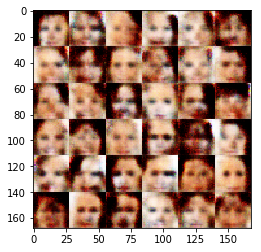

Epoch 1/1... Discriminator Loss: 0.7144... Generator Loss: 1.5976
Epoch 1/1... Discriminator Loss: 0.7839... Generator Loss: 1.8807
Epoch 1/1... Discriminator Loss: 0.7977... Generator Loss: 1.3604
Epoch 1/1... Discriminator Loss: 0.8135... Generator Loss: 1.7715
Epoch 1/1... Discriminator Loss: 0.8538... Generator Loss: 1.3471
Epoch 1/1... Discriminator Loss: 0.7458... Generator Loss: 1.8409
Epoch 1/1... Discriminator Loss: 0.8752... Generator Loss: 1.5417
Epoch 1/1... Discriminator Loss: 0.9120... Generator Loss: 1.6954
Epoch 1/1... Discriminator Loss: 0.9096... Generator Loss: 1.0496
Epoch 1/1... Discriminator Loss: 0.8410... Generator Loss: 1.5884


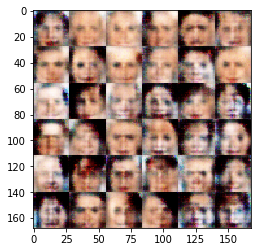

Epoch 1/1... Discriminator Loss: 0.8568... Generator Loss: 1.6464
Epoch 1/1... Discriminator Loss: 0.8401... Generator Loss: 1.6177
Epoch 1/1... Discriminator Loss: 0.7848... Generator Loss: 2.1137
Epoch 1/1... Discriminator Loss: 0.9443... Generator Loss: 1.2452
Epoch 1/1... Discriminator Loss: 0.9285... Generator Loss: 1.5514
Epoch 1/1... Discriminator Loss: 0.9517... Generator Loss: 1.3477
Epoch 1/1... Discriminator Loss: 0.9398... Generator Loss: 1.6096
Epoch 1/1... Discriminator Loss: 0.9014... Generator Loss: 1.2536
Epoch 1/1... Discriminator Loss: 0.8582... Generator Loss: 1.5595
Epoch 1/1... Discriminator Loss: 0.8629... Generator Loss: 1.3922


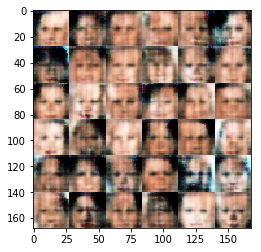

Epoch 1/1... Discriminator Loss: 0.8407... Generator Loss: 1.5983
Epoch 1/1... Discriminator Loss: 0.8910... Generator Loss: 1.5970
Epoch 1/1... Discriminator Loss: 0.9043... Generator Loss: 1.4584
Epoch 1/1... Discriminator Loss: 0.9048... Generator Loss: 1.4508
Epoch 1/1... Discriminator Loss: 0.7904... Generator Loss: 1.6208
Epoch 1/1... Discriminator Loss: 0.9361... Generator Loss: 1.8602
Epoch 1/1... Discriminator Loss: 0.9324... Generator Loss: 1.3225
Epoch 1/1... Discriminator Loss: 0.8782... Generator Loss: 1.5393
Epoch 1/1... Discriminator Loss: 0.9215... Generator Loss: 1.3355
Epoch 1/1... Discriminator Loss: 0.9463... Generator Loss: 1.3262


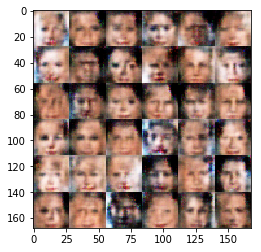

Epoch 1/1... Discriminator Loss: 0.8140... Generator Loss: 1.4559
Epoch 1/1... Discriminator Loss: 0.9844... Generator Loss: 1.2829
Epoch 1/1... Discriminator Loss: 0.9476... Generator Loss: 1.2582
Epoch 1/1... Discriminator Loss: 0.9391... Generator Loss: 1.4731
Epoch 1/1... Discriminator Loss: 1.0712... Generator Loss: 1.3390
Epoch 1/1... Discriminator Loss: 0.8340... Generator Loss: 1.4832
Epoch 1/1... Discriminator Loss: 0.9222... Generator Loss: 1.5585
Epoch 1/1... Discriminator Loss: 0.8797... Generator Loss: 1.4382
Epoch 1/1... Discriminator Loss: 1.1580... Generator Loss: 0.9730
Epoch 1/1... Discriminator Loss: 1.0051... Generator Loss: 1.1732


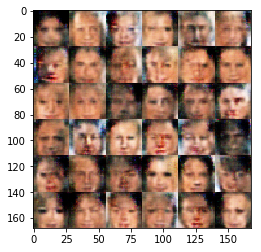

Epoch 1/1... Discriminator Loss: 0.9226... Generator Loss: 1.4019
Epoch 1/1... Discriminator Loss: 1.1338... Generator Loss: 0.9212
Epoch 1/1... Discriminator Loss: 0.9565... Generator Loss: 1.1661
Epoch 1/1... Discriminator Loss: 0.9801... Generator Loss: 1.0317
Epoch 1/1... Discriminator Loss: 1.0210... Generator Loss: 1.8425
Epoch 1/1... Discriminator Loss: 1.0117... Generator Loss: 1.3534
Epoch 1/1... Discriminator Loss: 0.9438... Generator Loss: 1.5122
Epoch 1/1... Discriminator Loss: 0.9489... Generator Loss: 1.3265
Epoch 1/1... Discriminator Loss: 0.9249... Generator Loss: 1.7957
Epoch 1/1... Discriminator Loss: 1.0990... Generator Loss: 1.0611


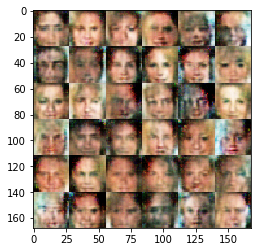

Epoch 1/1... Discriminator Loss: 0.9702... Generator Loss: 1.5532
Epoch 1/1... Discriminator Loss: 0.9186... Generator Loss: 1.5847
Epoch 1/1... Discriminator Loss: 0.9670... Generator Loss: 1.4470
Epoch 1/1... Discriminator Loss: 1.0190... Generator Loss: 1.2913
Epoch 1/1... Discriminator Loss: 0.9714... Generator Loss: 1.6641
Epoch 1/1... Discriminator Loss: 1.0912... Generator Loss: 1.3063
Epoch 1/1... Discriminator Loss: 1.0277... Generator Loss: 1.3397
Epoch 1/1... Discriminator Loss: 1.0986... Generator Loss: 1.3738
Epoch 1/1... Discriminator Loss: 0.8497... Generator Loss: 1.6557
Epoch 1/1... Discriminator Loss: 1.0452... Generator Loss: 1.0757


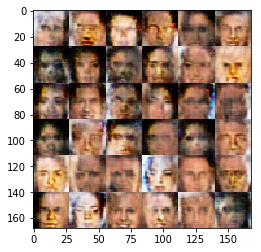

Epoch 1/1... Discriminator Loss: 0.9822... Generator Loss: 1.3117
Epoch 1/1... Discriminator Loss: 1.0958... Generator Loss: 1.3149
Epoch 1/1... Discriminator Loss: 1.0694... Generator Loss: 1.1962
Epoch 1/1... Discriminator Loss: 0.9951... Generator Loss: 1.2962
Epoch 1/1... Discriminator Loss: 1.2445... Generator Loss: 1.0239
Epoch 1/1... Discriminator Loss: 1.0595... Generator Loss: 1.3977
Epoch 1/1... Discriminator Loss: 1.2167... Generator Loss: 1.2868
Epoch 1/1... Discriminator Loss: 1.1351... Generator Loss: 1.0323
Epoch 1/1... Discriminator Loss: 1.1334... Generator Loss: 1.3121
Epoch 1/1... Discriminator Loss: 1.0985... Generator Loss: 1.5007


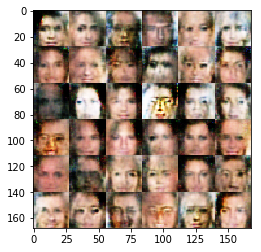

Epoch 1/1... Discriminator Loss: 1.1565... Generator Loss: 1.2073
Epoch 1/1... Discriminator Loss: 1.1288... Generator Loss: 1.0684
Epoch 1/1... Discriminator Loss: 1.1000... Generator Loss: 1.0893
Epoch 1/1... Discriminator Loss: 1.0405... Generator Loss: 0.9423
Epoch 1/1... Discriminator Loss: 1.1636... Generator Loss: 1.0023
Epoch 1/1... Discriminator Loss: 1.1813... Generator Loss: 1.1091
Epoch 1/1... Discriminator Loss: 1.0351... Generator Loss: 1.2282
Epoch 1/1... Discriminator Loss: 0.9282... Generator Loss: 1.3408
Epoch 1/1... Discriminator Loss: 1.2558... Generator Loss: 0.8899
Epoch 1/1... Discriminator Loss: 1.1901... Generator Loss: 1.1103


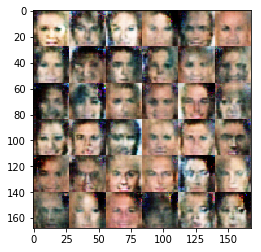

Epoch 1/1... Discriminator Loss: 1.0694... Generator Loss: 1.1410
Epoch 1/1... Discriminator Loss: 1.0502... Generator Loss: 1.3175
Epoch 1/1... Discriminator Loss: 1.0976... Generator Loss: 1.3935
Epoch 1/1... Discriminator Loss: 1.1651... Generator Loss: 1.3082
Epoch 1/1... Discriminator Loss: 1.1339... Generator Loss: 1.2765
Epoch 1/1... Discriminator Loss: 1.0458... Generator Loss: 1.1308
Epoch 1/1... Discriminator Loss: 1.1020... Generator Loss: 0.9371
Epoch 1/1... Discriminator Loss: 1.0145... Generator Loss: 1.4239
Epoch 1/1... Discriminator Loss: 1.2688... Generator Loss: 1.0156
Epoch 1/1... Discriminator Loss: 1.1940... Generator Loss: 1.5074


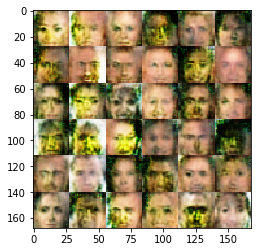

Epoch 1/1... Discriminator Loss: 1.0999... Generator Loss: 1.3608
Epoch 1/1... Discriminator Loss: 1.1304... Generator Loss: 1.1681
Epoch 1/1... Discriminator Loss: 1.1835... Generator Loss: 1.2370
Epoch 1/1... Discriminator Loss: 1.1962... Generator Loss: 1.0965
Epoch 1/1... Discriminator Loss: 1.1928... Generator Loss: 1.0162
Epoch 1/1... Discriminator Loss: 1.2735... Generator Loss: 1.0810
Epoch 1/1... Discriminator Loss: 1.1370... Generator Loss: 1.4623
Epoch 1/1... Discriminator Loss: 1.1505... Generator Loss: 1.4901
Epoch 1/1... Discriminator Loss: 1.1599... Generator Loss: 1.0917
Epoch 1/1... Discriminator Loss: 1.2050... Generator Loss: 0.9949


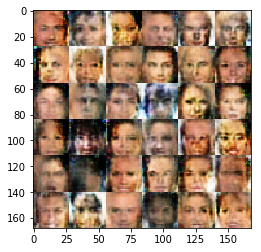

Epoch 1/1... Discriminator Loss: 1.2396... Generator Loss: 0.8993
Epoch 1/1... Discriminator Loss: 1.1932... Generator Loss: 0.8896
Epoch 1/1... Discriminator Loss: 1.2058... Generator Loss: 1.0247
Epoch 1/1... Discriminator Loss: 1.1535... Generator Loss: 1.3745
Epoch 1/1... Discriminator Loss: 1.1214... Generator Loss: 1.1480
Epoch 1/1... Discriminator Loss: 1.2149... Generator Loss: 1.3380
Epoch 1/1... Discriminator Loss: 1.1862... Generator Loss: 1.1206
Epoch 1/1... Discriminator Loss: 1.3185... Generator Loss: 0.8938
Epoch 1/1... Discriminator Loss: 1.1129... Generator Loss: 1.2995
Epoch 1/1... Discriminator Loss: 1.1599... Generator Loss: 1.1090


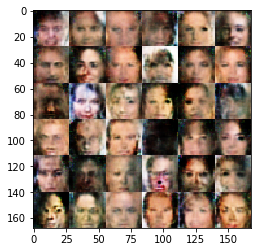

Epoch 1/1... Discriminator Loss: 1.2262... Generator Loss: 0.8794
Epoch 1/1... Discriminator Loss: 1.1464... Generator Loss: 1.2119
Epoch 1/1... Discriminator Loss: 1.1576... Generator Loss: 1.1456
Epoch 1/1... Discriminator Loss: 1.1792... Generator Loss: 1.1606
Epoch 1/1... Discriminator Loss: 1.2771... Generator Loss: 0.8243
Epoch 1/1... Discriminator Loss: 1.1144... Generator Loss: 1.1395
Epoch 1/1... Discriminator Loss: 1.2030... Generator Loss: 1.5124
Epoch 1/1... Discriminator Loss: 1.2482... Generator Loss: 0.9708
Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 1.4479
Epoch 1/1... Discriminator Loss: 1.2012... Generator Loss: 1.3084


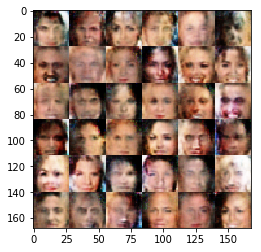

Epoch 1/1... Discriminator Loss: 1.2999... Generator Loss: 1.2062
Epoch 1/1... Discriminator Loss: 1.1861... Generator Loss: 0.9923
Epoch 1/1... Discriminator Loss: 1.3163... Generator Loss: 1.1211
Epoch 1/1... Discriminator Loss: 1.2532... Generator Loss: 1.0066
Epoch 1/1... Discriminator Loss: 1.1322... Generator Loss: 1.2535
Epoch 1/1... Discriminator Loss: 1.2325... Generator Loss: 1.3528
Epoch 1/1... Discriminator Loss: 1.1877... Generator Loss: 0.9845
Epoch 1/1... Discriminator Loss: 1.3315... Generator Loss: 0.9677
Epoch 1/1... Discriminator Loss: 1.1735... Generator Loss: 1.1470
Epoch 1/1... Discriminator Loss: 1.2378... Generator Loss: 1.1835


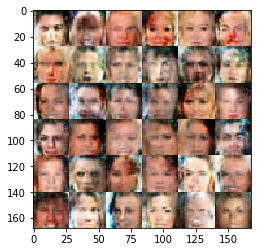

Epoch 1/1... Discriminator Loss: 1.0809... Generator Loss: 1.2366
Epoch 1/1... Discriminator Loss: 1.1621... Generator Loss: 1.1263
Epoch 1/1... Discriminator Loss: 1.2305... Generator Loss: 1.1164
Epoch 1/1... Discriminator Loss: 1.2615... Generator Loss: 1.0426
Epoch 1/1... Discriminator Loss: 1.2705... Generator Loss: 1.0033
Epoch 1/1... Discriminator Loss: 1.2506... Generator Loss: 1.1007
Epoch 1/1... Discriminator Loss: 1.1507... Generator Loss: 1.0363
Epoch 1/1... Discriminator Loss: 1.2554... Generator Loss: 0.9946
Epoch 1/1... Discriminator Loss: 1.1809... Generator Loss: 0.9904
Epoch 1/1... Discriminator Loss: 1.2612... Generator Loss: 0.8453


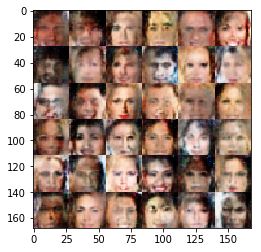

Epoch 1/1... Discriminator Loss: 1.2827... Generator Loss: 0.9539
Epoch 1/1... Discriminator Loss: 1.2803... Generator Loss: 0.8614
Epoch 1/1... Discriminator Loss: 1.2017... Generator Loss: 1.2640
Epoch 1/1... Discriminator Loss: 1.3061... Generator Loss: 0.7512
Epoch 1/1... Discriminator Loss: 1.0785... Generator Loss: 1.3754
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.9824
Epoch 1/1... Discriminator Loss: 1.2289... Generator Loss: 0.9330
Epoch 1/1... Discriminator Loss: 1.1619... Generator Loss: 1.2378
Epoch 1/1... Discriminator Loss: 1.2798... Generator Loss: 0.8303
Epoch 1/1... Discriminator Loss: 1.2729... Generator Loss: 0.9412


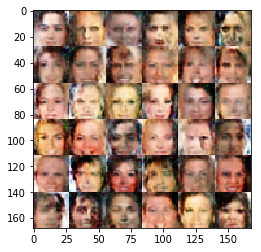

Epoch 1/1... Discriminator Loss: 1.1890... Generator Loss: 1.3710
Epoch 1/1... Discriminator Loss: 1.1842... Generator Loss: 0.9401
Epoch 1/1... Discriminator Loss: 1.2866... Generator Loss: 1.1298
Epoch 1/1... Discriminator Loss: 1.1618... Generator Loss: 1.1657
Epoch 1/1... Discriminator Loss: 1.1341... Generator Loss: 1.1549
Epoch 1/1... Discriminator Loss: 1.1999... Generator Loss: 1.1466
Epoch 1/1... Discriminator Loss: 1.2302... Generator Loss: 0.9818
Epoch 1/1... Discriminator Loss: 1.2475... Generator Loss: 0.9748
Epoch 1/1... Discriminator Loss: 1.3133... Generator Loss: 1.1032
Epoch 1/1... Discriminator Loss: 1.2563... Generator Loss: 1.0256


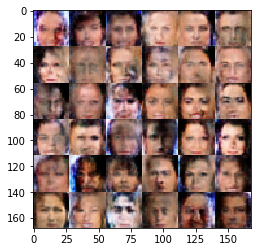

Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.9018
Epoch 1/1... Discriminator Loss: 1.2956... Generator Loss: 1.0193
Epoch 1/1... Discriminator Loss: 1.1956... Generator Loss: 1.1574
Epoch 1/1... Discriminator Loss: 1.1720... Generator Loss: 0.9908
Epoch 1/1... Discriminator Loss: 1.2474... Generator Loss: 1.0849
Epoch 1/1... Discriminator Loss: 1.2338... Generator Loss: 0.9587
Epoch 1/1... Discriminator Loss: 1.2311... Generator Loss: 1.1166
Epoch 1/1... Discriminator Loss: 1.2873... Generator Loss: 0.7724
Epoch 1/1... Discriminator Loss: 1.2258... Generator Loss: 1.1225
Epoch 1/1... Discriminator Loss: 1.3008... Generator Loss: 1.0051


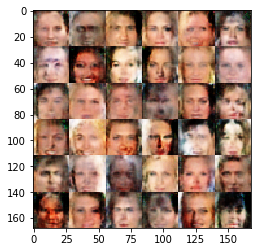

Epoch 1/1... Discriminator Loss: 1.2216... Generator Loss: 1.3106
Epoch 1/1... Discriminator Loss: 1.2000... Generator Loss: 0.9911
Epoch 1/1... Discriminator Loss: 1.1693... Generator Loss: 1.0388
Epoch 1/1... Discriminator Loss: 1.1096... Generator Loss: 1.2714
Epoch 1/1... Discriminator Loss: 1.2455... Generator Loss: 1.1088
Epoch 1/1... Discriminator Loss: 1.2560... Generator Loss: 1.0120
Epoch 1/1... Discriminator Loss: 1.2977... Generator Loss: 1.2579
Epoch 1/1... Discriminator Loss: 1.1655... Generator Loss: 1.1064
Epoch 1/1... Discriminator Loss: 1.1731... Generator Loss: 1.2255
Epoch 1/1... Discriminator Loss: 1.2405... Generator Loss: 0.9021


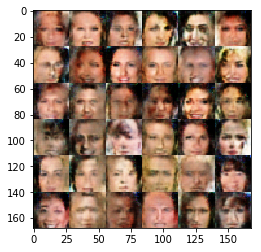

Epoch 1/1... Discriminator Loss: 1.3699... Generator Loss: 0.8900
Epoch 1/1... Discriminator Loss: 1.3120... Generator Loss: 1.0926
Epoch 1/1... Discriminator Loss: 1.2153... Generator Loss: 0.9357
Epoch 1/1... Discriminator Loss: 1.2662... Generator Loss: 1.1636
Epoch 1/1... Discriminator Loss: 1.3042... Generator Loss: 0.9528
Epoch 1/1... Discriminator Loss: 1.2126... Generator Loss: 0.9244
Epoch 1/1... Discriminator Loss: 1.1770... Generator Loss: 1.2642
Epoch 1/1... Discriminator Loss: 1.2127... Generator Loss: 1.0653
Epoch 1/1... Discriminator Loss: 1.1287... Generator Loss: 1.0128
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 0.8135


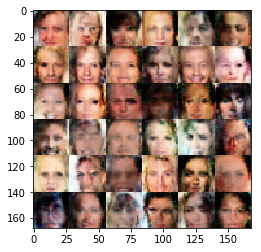

Epoch 1/1... Discriminator Loss: 1.2436... Generator Loss: 1.0077
Epoch 1/1... Discriminator Loss: 1.3840... Generator Loss: 1.1582
Epoch 1/1... Discriminator Loss: 1.3065... Generator Loss: 1.0460
Epoch 1/1... Discriminator Loss: 1.2196... Generator Loss: 1.3734
Epoch 1/1... Discriminator Loss: 1.0422... Generator Loss: 1.2500
Epoch 1/1... Discriminator Loss: 1.1678... Generator Loss: 1.0421
Epoch 1/1... Discriminator Loss: 1.0971... Generator Loss: 1.3745
Epoch 1/1... Discriminator Loss: 1.2628... Generator Loss: 1.1319
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.9222
Epoch 1/1... Discriminator Loss: 1.2096... Generator Loss: 1.2700


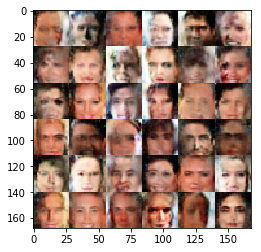

Epoch 1/1... Discriminator Loss: 1.1557... Generator Loss: 1.4380
Epoch 1/1... Discriminator Loss: 1.2281... Generator Loss: 1.2246
Epoch 1/1... Discriminator Loss: 1.2091... Generator Loss: 0.9715
Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 1.0064
Epoch 1/1... Discriminator Loss: 1.2458... Generator Loss: 1.0170
Epoch 1/1... Discriminator Loss: 1.2170... Generator Loss: 1.1528
Epoch 1/1... Discriminator Loss: 1.2388... Generator Loss: 1.1794
Epoch 1/1... Discriminator Loss: 1.1944... Generator Loss: 0.9513
Epoch 1/1... Discriminator Loss: 1.1911... Generator Loss: 1.1757
Epoch 1/1... Discriminator Loss: 1.1273... Generator Loss: 1.3530


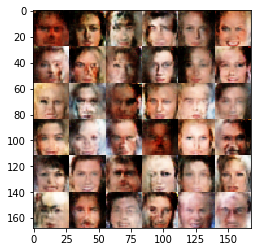

Epoch 1/1... Discriminator Loss: 1.2943... Generator Loss: 0.9977
Epoch 1/1... Discriminator Loss: 1.1824... Generator Loss: 1.1040
Epoch 1/1... Discriminator Loss: 1.3000... Generator Loss: 0.9402
Epoch 1/1... Discriminator Loss: 1.2970... Generator Loss: 0.9247
Epoch 1/1... Discriminator Loss: 1.1444... Generator Loss: 1.1811
Epoch 1/1... Discriminator Loss: 1.2230... Generator Loss: 1.0040
Epoch 1/1... Discriminator Loss: 1.1216... Generator Loss: 1.2205
Epoch 1/1... Discriminator Loss: 1.2197... Generator Loss: 1.0747
Epoch 1/1... Discriminator Loss: 1.4105... Generator Loss: 0.8233
Epoch 1/1... Discriminator Loss: 1.3041... Generator Loss: 0.7914


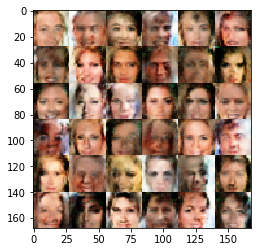

Epoch 1/1... Discriminator Loss: 1.1698... Generator Loss: 1.0432
Epoch 1/1... Discriminator Loss: 1.2384... Generator Loss: 1.1010
Epoch 1/1... Discriminator Loss: 1.3037... Generator Loss: 0.8564
Epoch 1/1... Discriminator Loss: 1.2927... Generator Loss: 0.9106
Epoch 1/1... Discriminator Loss: 1.2522... Generator Loss: 1.0182
Epoch 1/1... Discriminator Loss: 1.2474... Generator Loss: 1.0356
Epoch 1/1... Discriminator Loss: 1.1817... Generator Loss: 1.0896
Epoch 1/1... Discriminator Loss: 1.2939... Generator Loss: 0.9107
Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 0.9871
Epoch 1/1... Discriminator Loss: 1.0920... Generator Loss: 1.1351


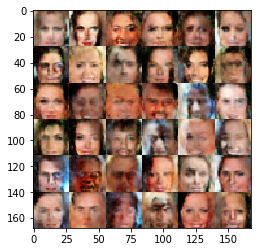

Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 1.0810
Epoch 1/1... Discriminator Loss: 1.2548... Generator Loss: 1.0088
Epoch 1/1... Discriminator Loss: 1.2574... Generator Loss: 1.0791
Epoch 1/1... Discriminator Loss: 1.2561... Generator Loss: 1.1066
Epoch 1/1... Discriminator Loss: 1.2008... Generator Loss: 0.9113
Epoch 1/1... Discriminator Loss: 1.2935... Generator Loss: 1.0309
Epoch 1/1... Discriminator Loss: 1.2332... Generator Loss: 1.1868
Epoch 1/1... Discriminator Loss: 1.2447... Generator Loss: 0.8864
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.7781
Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 1.2299


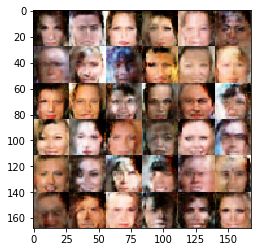

Epoch 1/1... Discriminator Loss: 1.3206... Generator Loss: 0.8194
Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 1.2141
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.9755
Epoch 1/1... Discriminator Loss: 1.2783... Generator Loss: 0.7541
Epoch 1/1... Discriminator Loss: 1.2118... Generator Loss: 0.9052
Epoch 1/1... Discriminator Loss: 1.1103... Generator Loss: 1.0024
Epoch 1/1... Discriminator Loss: 1.2604... Generator Loss: 0.9483
Epoch 1/1... Discriminator Loss: 1.2739... Generator Loss: 0.9995
Epoch 1/1... Discriminator Loss: 1.2809... Generator Loss: 0.9744
Epoch 1/1... Discriminator Loss: 1.3282... Generator Loss: 0.9411


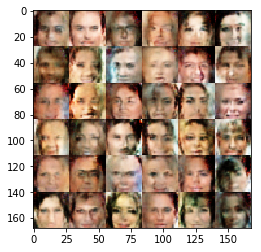

Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 0.9005
Epoch 1/1... Discriminator Loss: 1.3433... Generator Loss: 0.9707
Epoch 1/1... Discriminator Loss: 1.2382... Generator Loss: 0.9947
Epoch 1/1... Discriminator Loss: 1.3359... Generator Loss: 0.9341
Epoch 1/1... Discriminator Loss: 1.3497... Generator Loss: 0.9591
Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 1.0314
Epoch 1/1... Discriminator Loss: 1.2391... Generator Loss: 0.9311
Epoch 1/1... Discriminator Loss: 1.2481... Generator Loss: 1.0549
Epoch 1/1... Discriminator Loss: 1.3210... Generator Loss: 0.7718
Epoch 1/1... Discriminator Loss: 1.2372... Generator Loss: 1.0181


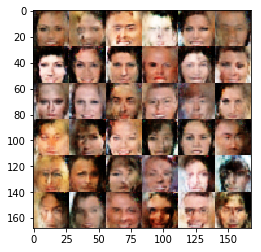

Epoch 1/1... Discriminator Loss: 1.1184... Generator Loss: 1.1113
Epoch 1/1... Discriminator Loss: 1.2105... Generator Loss: 1.1330
Epoch 1/1... Discriminator Loss: 1.2134... Generator Loss: 1.0870
Epoch 1/1... Discriminator Loss: 1.3319... Generator Loss: 0.8277
Epoch 1/1... Discriminator Loss: 1.1905... Generator Loss: 1.2437
Epoch 1/1... Discriminator Loss: 1.0269... Generator Loss: 1.3152
Epoch 1/1... Discriminator Loss: 1.3299... Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 1.2762... Generator Loss: 0.9237
Epoch 1/1... Discriminator Loss: 1.3184... Generator Loss: 0.9580
Epoch 1/1... Discriminator Loss: 1.1589... Generator Loss: 1.1765


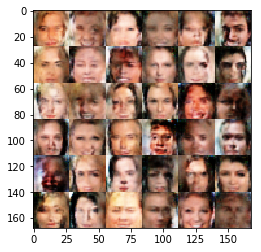

Epoch 1/1... Discriminator Loss: 1.2422... Generator Loss: 0.9587
Epoch 1/1... Discriminator Loss: 1.2561... Generator Loss: 0.9129
Epoch 1/1... Discriminator Loss: 1.2571... Generator Loss: 0.9903
Epoch 1/1... Discriminator Loss: 1.3127... Generator Loss: 1.0354
Epoch 1/1... Discriminator Loss: 1.0328... Generator Loss: 1.4047
Epoch 1/1... Discriminator Loss: 1.3720... Generator Loss: 0.8909
Epoch 1/1... Discriminator Loss: 1.2991... Generator Loss: 0.9711
Epoch 1/1... Discriminator Loss: 1.2713... Generator Loss: 0.9254
Epoch 1/1... Discriminator Loss: 1.1916... Generator Loss: 1.0593
Epoch 1/1... Discriminator Loss: 1.3028... Generator Loss: 0.9352


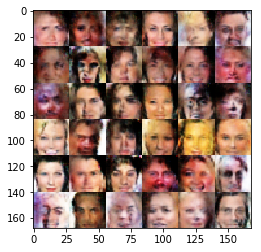

Epoch 1/1... Discriminator Loss: 1.3482... Generator Loss: 1.0069
Epoch 1/1... Discriminator Loss: 1.3481... Generator Loss: 1.0856
Epoch 1/1... Discriminator Loss: 1.3502... Generator Loss: 1.0367
Epoch 1/1... Discriminator Loss: 1.3378... Generator Loss: 1.0589
Epoch 1/1... Discriminator Loss: 1.2968... Generator Loss: 1.1470
Epoch 1/1... Discriminator Loss: 1.2031... Generator Loss: 1.1225
Epoch 1/1... Discriminator Loss: 1.2844... Generator Loss: 1.1023
Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 0.8865
Epoch 1/1... Discriminator Loss: 1.2617... Generator Loss: 0.9183
Epoch 1/1... Discriminator Loss: 1.2769... Generator Loss: 1.0163


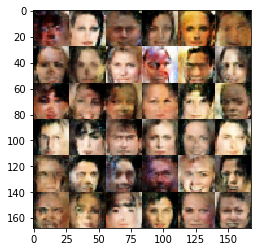

Epoch 1/1... Discriminator Loss: 1.2862... Generator Loss: 0.8649
Epoch 1/1... Discriminator Loss: 1.3515... Generator Loss: 0.9983
Epoch 1/1... Discriminator Loss: 1.3094... Generator Loss: 1.0304
Epoch 1/1... Discriminator Loss: 1.2188... Generator Loss: 1.0737
Epoch 1/1... Discriminator Loss: 1.1455... Generator Loss: 1.1269
Epoch 1/1... Discriminator Loss: 1.3161... Generator Loss: 1.1079
Epoch 1/1... Discriminator Loss: 1.3334... Generator Loss: 0.8600
Epoch 1/1... Discriminator Loss: 1.2995... Generator Loss: 0.9421
Epoch 1/1... Discriminator Loss: 1.3321... Generator Loss: 0.7436
Epoch 1/1... Discriminator Loss: 1.2859... Generator Loss: 1.0435


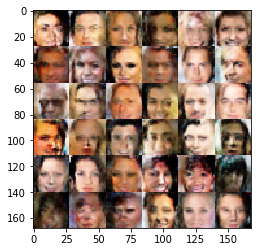

Epoch 1/1... Discriminator Loss: 1.4263... Generator Loss: 0.8320
Epoch 1/1... Discriminator Loss: 1.2642... Generator Loss: 0.9389
Epoch 1/1... Discriminator Loss: 1.3047... Generator Loss: 0.9821
Epoch 1/1... Discriminator Loss: 1.2760... Generator Loss: 1.0078
Epoch 1/1... Discriminator Loss: 1.2058... Generator Loss: 1.1793
Epoch 1/1... Discriminator Loss: 1.2288... Generator Loss: 1.0761
Epoch 1/1... Discriminator Loss: 1.2017... Generator Loss: 1.0666
Epoch 1/1... Discriminator Loss: 1.1657... Generator Loss: 1.3230
Epoch 1/1... Discriminator Loss: 1.2710... Generator Loss: 1.0975
Epoch 1/1... Discriminator Loss: 1.2519... Generator Loss: 1.0728


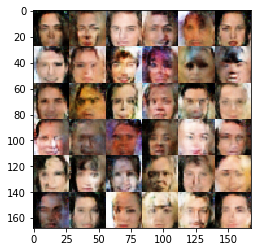

Epoch 1/1... Discriminator Loss: 1.2900... Generator Loss: 1.2123
Epoch 1/1... Discriminator Loss: 1.2516... Generator Loss: 1.1463
Epoch 1/1... Discriminator Loss: 1.2820... Generator Loss: 0.9825
Epoch 1/1... Discriminator Loss: 1.3540... Generator Loss: 0.9438
Epoch 1/1... Discriminator Loss: 1.2265... Generator Loss: 1.0289
Epoch 1/1... Discriminator Loss: 1.3305... Generator Loss: 1.0438
Epoch 1/1... Discriminator Loss: 1.2685... Generator Loss: 0.8748
Epoch 1/1... Discriminator Loss: 1.2367... Generator Loss: 1.1464
Epoch 1/1... Discriminator Loss: 1.2980... Generator Loss: 0.8436
Epoch 1/1... Discriminator Loss: 1.3010... Generator Loss: 1.0025


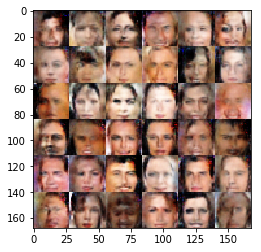

Epoch 1/1... Discriminator Loss: 1.3787... Generator Loss: 0.9873
Epoch 1/1... Discriminator Loss: 1.2427... Generator Loss: 0.9837
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.8187
Epoch 1/1... Discriminator Loss: 1.2091... Generator Loss: 1.0328
Epoch 1/1... Discriminator Loss: 1.2550... Generator Loss: 1.0944
Epoch 1/1... Discriminator Loss: 1.3972... Generator Loss: 1.0383
Epoch 1/1... Discriminator Loss: 1.2384... Generator Loss: 0.9806
Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 0.8349
Epoch 1/1... Discriminator Loss: 1.2647... Generator Loss: 1.0228
Epoch 1/1... Discriminator Loss: 1.3023... Generator Loss: 0.8970


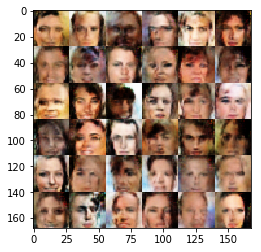

Epoch 1/1... Discriminator Loss: 1.2678... Generator Loss: 0.8956
Epoch 1/1... Discriminator Loss: 1.2786... Generator Loss: 1.1507
Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 1.0744
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.8302
Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 0.9743
Epoch 1/1... Discriminator Loss: 1.3079... Generator Loss: 0.8645
Epoch 1/1... Discriminator Loss: 1.3333... Generator Loss: 0.9799
Epoch 1/1... Discriminator Loss: 1.3211... Generator Loss: 1.0950
Epoch 1/1... Discriminator Loss: 1.3591... Generator Loss: 0.8591
Epoch 1/1... Discriminator Loss: 1.3322... Generator Loss: 1.0204


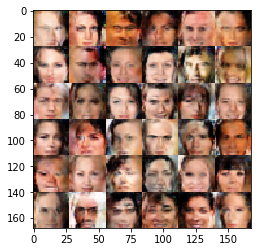

Epoch 1/1... Discriminator Loss: 1.1848... Generator Loss: 1.1048
Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 1.0016
Epoch 1/1... Discriminator Loss: 1.2228... Generator Loss: 1.0902
Epoch 1/1... Discriminator Loss: 1.3463... Generator Loss: 0.8767
Epoch 1/1... Discriminator Loss: 1.2630... Generator Loss: 0.8806
Epoch 1/1... Discriminator Loss: 1.3158... Generator Loss: 0.9426
Epoch 1/1... Discriminator Loss: 1.3017... Generator Loss: 0.8954
Epoch 1/1... Discriminator Loss: 1.2575... Generator Loss: 0.8431
Epoch 1/1... Discriminator Loss: 1.3267... Generator Loss: 0.8540
Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 0.9878


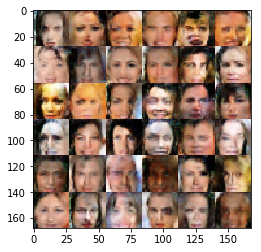

Epoch 1/1... Discriminator Loss: 1.2553... Generator Loss: 1.0235
Epoch 1/1... Discriminator Loss: 1.3552... Generator Loss: 0.8532
Epoch 1/1... Discriminator Loss: 1.2267... Generator Loss: 1.2206
Epoch 1/1... Discriminator Loss: 1.3611... Generator Loss: 0.8643
Epoch 1/1... Discriminator Loss: 1.2778... Generator Loss: 0.8633
Epoch 1/1... Discriminator Loss: 1.2718... Generator Loss: 1.1155
Epoch 1/1... Discriminator Loss: 1.2739... Generator Loss: 1.0700
Epoch 1/1... Discriminator Loss: 1.3097... Generator Loss: 1.1386
Epoch 1/1... Discriminator Loss: 1.2401... Generator Loss: 0.9565
Epoch 1/1... Discriminator Loss: 1.3666... Generator Loss: 0.8110


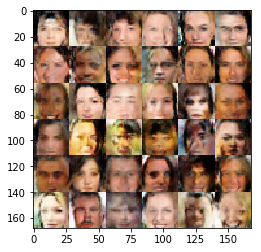

Epoch 1/1... Discriminator Loss: 1.2884... Generator Loss: 1.0849
Epoch 1/1... Discriminator Loss: 1.3879... Generator Loss: 0.8865
Epoch 1/1... Discriminator Loss: 1.2790... Generator Loss: 0.9037
Epoch 1/1... Discriminator Loss: 1.2275... Generator Loss: 1.0497
Epoch 1/1... Discriminator Loss: 1.3755... Generator Loss: 0.9950
Epoch 1/1... Discriminator Loss: 1.2840... Generator Loss: 0.9426
Epoch 1/1... Discriminator Loss: 1.2413... Generator Loss: 1.0703
Epoch 1/1... Discriminator Loss: 1.2979... Generator Loss: 1.1185
Epoch 1/1... Discriminator Loss: 1.3017... Generator Loss: 0.8339
Epoch 1/1... Discriminator Loss: 1.2757... Generator Loss: 1.1365


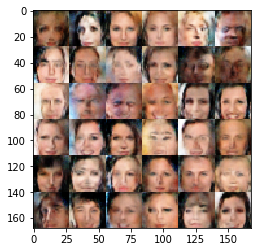

Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 1.0098
Epoch 1/1... Discriminator Loss: 1.3265... Generator Loss: 1.0118
Epoch 1/1... Discriminator Loss: 1.3125... Generator Loss: 0.9215
Epoch 1/1... Discriminator Loss: 1.2504... Generator Loss: 1.0201
Epoch 1/1... Discriminator Loss: 1.3295... Generator Loss: 0.9333
Epoch 1/1... Discriminator Loss: 1.2855... Generator Loss: 1.1321
Epoch 1/1... Discriminator Loss: 1.2921... Generator Loss: 0.9350
Epoch 1/1... Discriminator Loss: 1.2312... Generator Loss: 0.9154
Epoch 1/1... Discriminator Loss: 1.2092... Generator Loss: 1.1168
Epoch 1/1... Discriminator Loss: 1.2874... Generator Loss: 0.9653


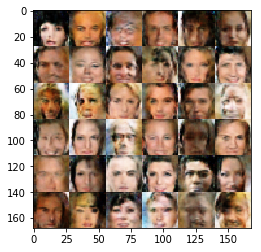

Epoch 1/1... Discriminator Loss: 1.2941... Generator Loss: 0.9591
Epoch 1/1... Discriminator Loss: 1.2088... Generator Loss: 1.0896
Epoch 1/1... Discriminator Loss: 1.3059... Generator Loss: 0.9049
Epoch 1/1... Discriminator Loss: 1.2041... Generator Loss: 1.1070
Epoch 1/1... Discriminator Loss: 1.3757... Generator Loss: 0.9032
Epoch 1/1... Discriminator Loss: 1.2477... Generator Loss: 0.9444
Epoch 1/1... Discriminator Loss: 1.3126... Generator Loss: 0.9057
Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 0.8579
Epoch 1/1... Discriminator Loss: 1.2017... Generator Loss: 1.0591
Epoch 1/1... Discriminator Loss: 1.2926... Generator Loss: 0.8903


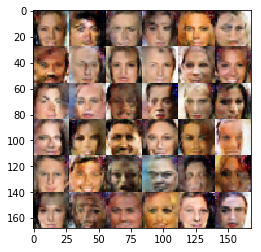

Epoch 1/1... Discriminator Loss: 1.3236... Generator Loss: 0.8611
Epoch 1/1... Discriminator Loss: 1.2910... Generator Loss: 0.9768
Epoch 1/1... Discriminator Loss: 1.2246... Generator Loss: 0.9538
Epoch 1/1... Discriminator Loss: 1.2656... Generator Loss: 0.9423
Epoch 1/1... Discriminator Loss: 1.4137... Generator Loss: 0.8072
Epoch 1/1... Discriminator Loss: 1.2636... Generator Loss: 1.0698
Epoch 1/1... Discriminator Loss: 1.2888... Generator Loss: 0.9824
Epoch 1/1... Discriminator Loss: 1.1930... Generator Loss: 1.0755
Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 1.0284
Epoch 1/1... Discriminator Loss: 1.2860... Generator Loss: 0.9483


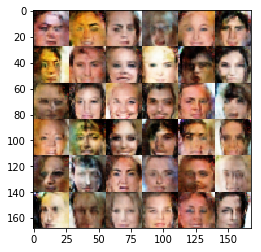

Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 0.9834
Epoch 1/1... Discriminator Loss: 1.2915... Generator Loss: 1.0874
Epoch 1/1... Discriminator Loss: 1.1876... Generator Loss: 0.8960
Epoch 1/1... Discriminator Loss: 1.2804... Generator Loss: 0.8957
Epoch 1/1... Discriminator Loss: 1.2918... Generator Loss: 0.9869
Epoch 1/1... Discriminator Loss: 1.2888... Generator Loss: 1.0185
Epoch 1/1... Discriminator Loss: 1.3470... Generator Loss: 0.8479
Epoch 1/1... Discriminator Loss: 1.2547... Generator Loss: 0.9560
Epoch 1/1... Discriminator Loss: 1.2702... Generator Loss: 1.0224
Epoch 1/1... Discriminator Loss: 1.3506... Generator Loss: 1.0338


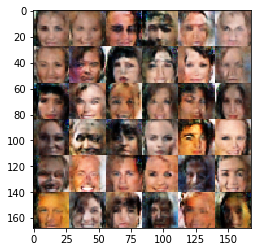

Epoch 1/1... Discriminator Loss: 1.1829... Generator Loss: 1.2275
Epoch 1/1... Discriminator Loss: 1.3221... Generator Loss: 0.8174
Epoch 1/1... Discriminator Loss: 1.2176... Generator Loss: 1.1021
Epoch 1/1... Discriminator Loss: 1.4668... Generator Loss: 0.6332
Epoch 1/1... Discriminator Loss: 1.2290... Generator Loss: 1.1514
Epoch 1/1... Discriminator Loss: 1.2102... Generator Loss: 1.0782
Epoch 1/1... Discriminator Loss: 1.3728... Generator Loss: 0.8381
Epoch 1/1... Discriminator Loss: 1.3043... Generator Loss: 0.9543
Epoch 1/1... Discriminator Loss: 1.4435... Generator Loss: 0.8753
Epoch 1/1... Discriminator Loss: 1.2704... Generator Loss: 0.9809


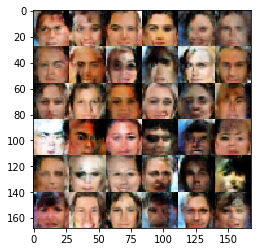

Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 1.1987
Epoch 1/1... Discriminator Loss: 1.2021... Generator Loss: 1.0499
Epoch 1/1... Discriminator Loss: 1.4071... Generator Loss: 0.7950
Epoch 1/1... Discriminator Loss: 1.2622... Generator Loss: 0.9950
Epoch 1/1... Discriminator Loss: 1.3784... Generator Loss: 0.9122
Epoch 1/1... Discriminator Loss: 1.3135... Generator Loss: 0.8373
Epoch 1/1... Discriminator Loss: 1.2931... Generator Loss: 0.9484
Epoch 1/1... Discriminator Loss: 1.3001... Generator Loss: 0.9786
Epoch 1/1... Discriminator Loss: 1.3167... Generator Loss: 0.8579
Epoch 1/1... Discriminator Loss: 1.2694... Generator Loss: 0.9580


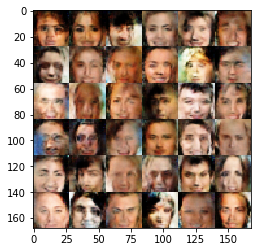

Epoch 1/1... Discriminator Loss: 1.3033... Generator Loss: 0.9434
Epoch 1/1... Discriminator Loss: 1.2591... Generator Loss: 0.9069
Epoch 1/1... Discriminator Loss: 1.3515... Generator Loss: 0.9640
Epoch 1/1... Discriminator Loss: 1.4175... Generator Loss: 0.8187
Epoch 1/1... Discriminator Loss: 1.3257... Generator Loss: 0.9805
Epoch 1/1... Discriminator Loss: 1.3459... Generator Loss: 0.8276
Epoch 1/1... Discriminator Loss: 1.2571... Generator Loss: 1.0028
Epoch 1/1... Discriminator Loss: 1.2583... Generator Loss: 0.9490
Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 0.7691
Epoch 1/1... Discriminator Loss: 1.2608... Generator Loss: 0.9576


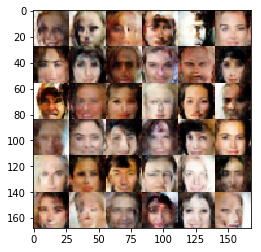

Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.8539
Epoch 1/1... Discriminator Loss: 1.3020... Generator Loss: 0.9252
Epoch 1/1... Discriminator Loss: 1.2498... Generator Loss: 1.1188
Epoch 1/1... Discriminator Loss: 1.4297... Generator Loss: 1.0256
Epoch 1/1... Discriminator Loss: 1.3759... Generator Loss: 0.8517
Epoch 1/1... Discriminator Loss: 1.3235... Generator Loss: 0.8868
Epoch 1/1... Discriminator Loss: 1.3168... Generator Loss: 1.0905
Epoch 1/1... Discriminator Loss: 1.2869... Generator Loss: 0.9502
Epoch 1/1... Discriminator Loss: 1.3174... Generator Loss: 0.9207
Epoch 1/1... Discriminator Loss: 1.3648... Generator Loss: 0.8951


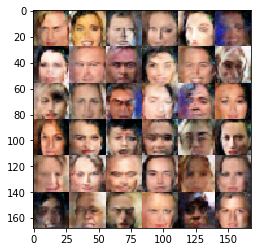

Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 0.8936
Epoch 1/1... Discriminator Loss: 1.2438... Generator Loss: 1.0119
Epoch 1/1... Discriminator Loss: 1.2868... Generator Loss: 0.8737
Epoch 1/1... Discriminator Loss: 1.3652... Generator Loss: 0.9274
Epoch 1/1... Discriminator Loss: 1.3367... Generator Loss: 0.9251
Epoch 1/1... Discriminator Loss: 1.4353... Generator Loss: 0.9184
Epoch 1/1... Discriminator Loss: 1.2396... Generator Loss: 1.0498
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 1.0259
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.7791
Epoch 1/1... Discriminator Loss: 1.2489... Generator Loss: 0.9966


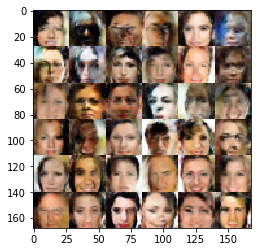

Epoch 1/1... Discriminator Loss: 1.2843... Generator Loss: 1.0392
Epoch 1/1... Discriminator Loss: 1.3105... Generator Loss: 0.8458
Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 0.9236
Epoch 1/1... Discriminator Loss: 1.2688... Generator Loss: 1.0416
Epoch 1/1... Discriminator Loss: 1.2771... Generator Loss: 0.9369
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 0.8257
Epoch 1/1... Discriminator Loss: 1.1892... Generator Loss: 1.1217
Epoch 1/1... Discriminator Loss: 1.2371... Generator Loss: 0.8523
Epoch 1/1... Discriminator Loss: 1.4372... Generator Loss: 0.7226
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 1.0184


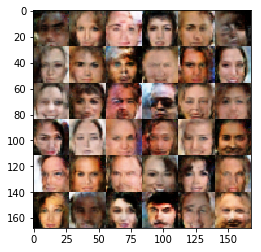

Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.8308
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.7354
Epoch 1/1... Discriminator Loss: 1.3256... Generator Loss: 1.0853
Epoch 1/1... Discriminator Loss: 1.3666... Generator Loss: 0.8091
Epoch 1/1... Discriminator Loss: 1.1598... Generator Loss: 1.0276
Epoch 1/1... Discriminator Loss: 1.3873... Generator Loss: 0.7976
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.9358
Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 0.9361
Epoch 1/1... Discriminator Loss: 1.3343... Generator Loss: 0.8328
Epoch 1/1... Discriminator Loss: 1.2718... Generator Loss: 0.9192


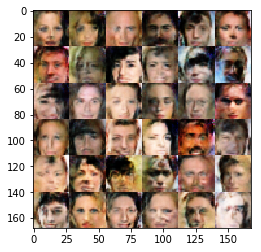

Epoch 1/1... Discriminator Loss: 1.2343... Generator Loss: 0.9250
Epoch 1/1... Discriminator Loss: 1.2982... Generator Loss: 0.9953
Epoch 1/1... Discriminator Loss: 1.3054... Generator Loss: 0.8618
Epoch 1/1... Discriminator Loss: 1.3013... Generator Loss: 0.9429
Epoch 1/1... Discriminator Loss: 1.2404... Generator Loss: 0.8147
Epoch 1/1... Discriminator Loss: 1.4038... Generator Loss: 0.9028
Epoch 1/1... Discriminator Loss: 1.1861... Generator Loss: 1.0507
Epoch 1/1... Discriminator Loss: 1.4193... Generator Loss: 0.9632
Epoch 1/1... Discriminator Loss: 1.3393... Generator Loss: 0.8611
Epoch 1/1... Discriminator Loss: 1.3814... Generator Loss: 0.7549


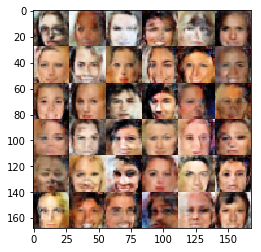

Epoch 1/1... Discriminator Loss: 1.2699... Generator Loss: 0.9636
Epoch 1/1... Discriminator Loss: 1.3160... Generator Loss: 0.9516
Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 0.9814
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 0.7650
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.8113
Epoch 1/1... Discriminator Loss: 1.3460... Generator Loss: 0.7661
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 0.9217
Epoch 1/1... Discriminator Loss: 1.2901... Generator Loss: 0.8012
Epoch 1/1... Discriminator Loss: 1.3038... Generator Loss: 0.8206
Epoch 1/1... Discriminator Loss: 1.2393... Generator Loss: 1.0019


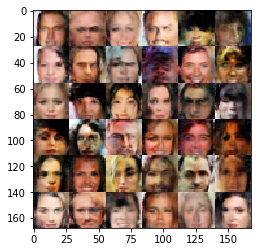

Epoch 1/1... Discriminator Loss: 1.2926... Generator Loss: 0.9388
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.8056
Epoch 1/1... Discriminator Loss: 1.3668... Generator Loss: 0.8077
Epoch 1/1... Discriminator Loss: 1.2833... Generator Loss: 0.9163
Epoch 1/1... Discriminator Loss: 1.2460... Generator Loss: 1.0734
Epoch 1/1... Discriminator Loss: 1.3169... Generator Loss: 0.9451
Epoch 1/1... Discriminator Loss: 1.3471... Generator Loss: 0.8973
Epoch 1/1... Discriminator Loss: 1.3233... Generator Loss: 0.7882
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 1.0168
Epoch 1/1... Discriminator Loss: 1.3779... Generator Loss: 0.9865


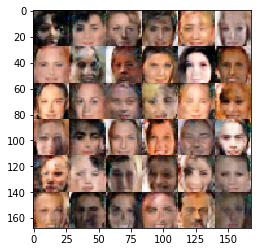

Epoch 1/1... Discriminator Loss: 1.2913... Generator Loss: 0.9271
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.8693
Epoch 1/1... Discriminator Loss: 1.2749... Generator Loss: 0.8419
Epoch 1/1... Discriminator Loss: 1.4732... Generator Loss: 0.6810
Epoch 1/1... Discriminator Loss: 1.4309... Generator Loss: 0.9199
Epoch 1/1... Discriminator Loss: 1.3719... Generator Loss: 0.7411
Epoch 1/1... Discriminator Loss: 1.3037... Generator Loss: 0.8850
Epoch 1/1... Discriminator Loss: 1.2957... Generator Loss: 0.8506
Epoch 1/1... Discriminator Loss: 1.3186... Generator Loss: 0.8376
Epoch 1/1... Discriminator Loss: 1.2713... Generator Loss: 0.9465


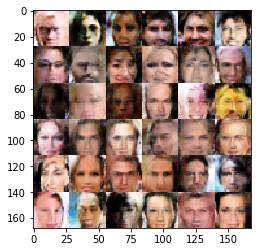

Epoch 1/1... Discriminator Loss: 1.2990... Generator Loss: 0.9757
Epoch 1/1... Discriminator Loss: 1.2852... Generator Loss: 0.9741
Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 0.9702
Epoch 1/1... Discriminator Loss: 1.3514... Generator Loss: 0.7831
Epoch 1/1... Discriminator Loss: 1.3834... Generator Loss: 0.8615
Epoch 1/1... Discriminator Loss: 1.4593... Generator Loss: 0.7609
Epoch 1/1... Discriminator Loss: 1.2694... Generator Loss: 0.9274
Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.9222
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 0.9223
Epoch 1/1... Discriminator Loss: 1.2979... Generator Loss: 0.9444


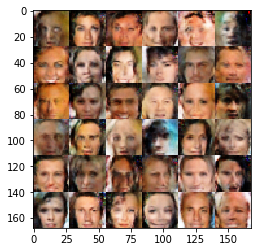

Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.8000
Epoch 1/1... Discriminator Loss: 1.3258... Generator Loss: 0.9104
Epoch 1/1... Discriminator Loss: 1.2915... Generator Loss: 1.0119
Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.9527
Epoch 1/1... Discriminator Loss: 1.4415... Generator Loss: 0.9494
Epoch 1/1... Discriminator Loss: 1.3602... Generator Loss: 0.9449
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 0.9726
Epoch 1/1... Discriminator Loss: 1.2719... Generator Loss: 1.0915
Epoch 1/1... Discriminator Loss: 1.2921... Generator Loss: 0.8964
Epoch 1/1... Discriminator Loss: 1.2876... Generator Loss: 0.9098


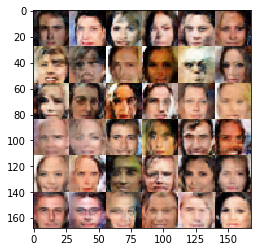

Epoch 1/1... Discriminator Loss: 1.2753... Generator Loss: 0.9604
Epoch 1/1... Discriminator Loss: 1.4156... Generator Loss: 0.7928
Epoch 1/1... Discriminator Loss: 1.3214... Generator Loss: 0.8273
Epoch 1/1... Discriminator Loss: 1.3715... Generator Loss: 0.9038
Epoch 1/1... Discriminator Loss: 1.3187... Generator Loss: 0.7953
Epoch 1/1... Discriminator Loss: 1.3136... Generator Loss: 1.0308
Epoch 1/1... Discriminator Loss: 1.2948... Generator Loss: 0.8808
Epoch 1/1... Discriminator Loss: 1.2507... Generator Loss: 0.9532
Epoch 1/1... Discriminator Loss: 1.3236... Generator Loss: 0.8763
Epoch 1/1... Discriminator Loss: 1.1800... Generator Loss: 1.0142


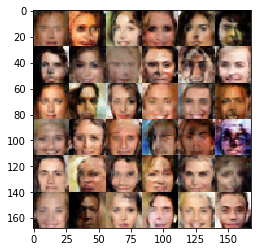

Epoch 1/1... Discriminator Loss: 1.3365... Generator Loss: 0.8783
Epoch 1/1... Discriminator Loss: 1.3887... Generator Loss: 0.9600
Epoch 1/1... Discriminator Loss: 1.3435... Generator Loss: 0.7779
Epoch 1/1... Discriminator Loss: 1.2920... Generator Loss: 0.8741
Epoch 1/1... Discriminator Loss: 1.2711... Generator Loss: 0.8294
Epoch 1/1... Discriminator Loss: 1.4083... Generator Loss: 0.7823
Epoch 1/1... Discriminator Loss: 1.2749... Generator Loss: 0.9807
Epoch 1/1... Discriminator Loss: 1.2901... Generator Loss: 0.9949
Epoch 1/1... Discriminator Loss: 1.4091... Generator Loss: 0.9234
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.8668


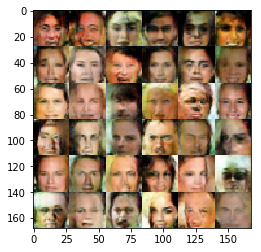

Epoch 1/1... Discriminator Loss: 1.3442... Generator Loss: 0.7919
Epoch 1/1... Discriminator Loss: 1.3282... Generator Loss: 0.8783
Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 0.8645


In [26]:
batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.